## Building the MDP:

### A Markov Decision Process in a Grid World
Consider a gridworld system with noisy dynamics which gets positive rewards $R_D, R_S$ for being in the two blue ice cream store states, and negative reward $R_W$ for being in any red road state. Formulate and solve a complete MDP problem, finding the optimal policy for a variety of task definitions.  Some questions to answer:

How would we formulate a problem that ends with a one-time (discounted) reward $R_D$ or $R_S$ whenever the system is in the respective ice cream store state as an infinite time horizon problem?  What if the reward was not discounted?
How instead would we formulate an infinite horizon, never-ending problem such that the system only achieves a reward upon entering the store rather than simply being in the store?
How many different optimal trajectories can we find by changing just the task definition ($R_D, R_S, R_W, \gamma$), each starting at the same location?
How do those trajectories / policies change as the system dynamics (error probabilities) change?
Under what conditions would it be an optimal strategy to visit both ice cream stores in the same trajectory?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from pylab import rcParams

In [ ]:
# This function computes the transition probability matrix:
def f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=0.9):
  # Inputs:
  # n = board size
  # o_v = array of obstacles
  # i_v = array of ice cream shops
  # r_v = array of roads
  # t_v = array of traps
  # p = Bernoulli probability
  # Outputs:
  # T = transition probability matrix (N_states x N_actions x N_states)
    # 1st coord = current state, 2nd coord = actions, 3rd coord = next state
    # Note: state labels start in the top left corner of the grid and increase
  # as we move right and down.
  
  N_states = n**2 # Number of states
  N_actions = 5 # Number of actions

  # Transition probability matrix:
  T = np.zeros((N_states,N_actions,N_states))

  p1 = p # Transition probability of desired actions
  p2 = (1-p1)/(N_actions - 1) # Transition probability of other actions
  pv = np.array([p1, p2, p2, p2, p2]) # Array of probabilities.
  # We will cycle through pv from right to left
  # Actions: stay, down, up, left, right

  # Loop through actions and states
  # (from state j, using action i, to state j')
  for i in np.arange(N_actions):
      for j in np.arange(N_states):
          # If we're not at an obstacle:
          if j not in o_v:
              # Stay in the same state:
              T[j,i,j] = pv[i]

          # If we're not in a trap state:
          if j not in t_v:
            # If we're not in the right column / no obstacles:
            if np.mod(j+1,n) != 0 and j not in o_v and j not in (o_v - 1):
                # Go right:
                T[j,i,j+1] = pv[np.mod(i+1,N_actions)]
            # If we're not in the left column / no obstacles:
            if np.mod(j,n) != 0 and j not in o_v and j not in (o_v + 1):
                # Go left:
                T[j,i,j-1] = pv[np.mod(i+2,N_actions)]
            # If we're not in the top row / no obstacles:
            if j > n-1 and j not in o_v and j not in (o_v + n):
                # Go up:
                T[j,i,j-n] = pv[np.mod(i+3,N_actions)]
            # If we're not in the bottom row / no obstacles:
            if j < (N_states - n) and j not in o_v and j not in (o_v - n):
                # Go down:
                T[j,i,j+n] = pv[np.mod(i+4,N_actions)]
              
            # Increase probability of staying in the same state:
            # (We're not already at an obstacle)
            # If we can't move right:
            if (np.mod(j+1,n) == 0 or j in (o_v - 1)) and j not in o_v:
                T[j,i,j] += pv[np.mod(i+1,N_actions)]
            # If we can't move left:
            if (np.mod(j,n) == 0 or j in (o_v + 1)) and j not in o_v:
                T[j,i,j] += pv[np.mod(i+2,N_actions)]
            # If we can't move up:
            if (j <= (n - 1) or j in (o_v + n)) and j not in o_v:
                T[j,i,j] += pv[np.mod(i+3,N_actions)]
            # If we can't move down:
            if (j >= (N_states - n) or j in (o_v - n)) and j not in o_v:
                T[j,i,j] += pv[np.mod(i+4,N_actions)]

          else:
            # Probabilities of escape, in each direction:
            if j+1 < n**2:
              T[j,i,j+1] = 0
            if j-1 >= 0:
              T[j,i,j-1] = 0
            if j-n > 0:
              T[j,i,j-n] = 0
            if j+n < n**2:
              T[j,i,j+n] = 0
            T[j,i,j] = 1 # Probability of remaining trapped
          
          # If we're in an obstacle or trap state, we remain in this state:
          if j in o_v or j in t_v:
            T[j,i,j] = 1
        
  return T

In [ ]:
# n = 5 # Board size
# p = 0.9 # Transition probability
# o_v = np.array([6,7,16,17]) # Array of obstacle states
# i_v = np.array([12,22]) # Array of ice cream shop states
# r_v = np.array([4,9,14,19,24]) # Array of road states
# t_v = np.array([])
# # t_v = r_v

# T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p) # Compute transition matrix

In [ ]:
# Compute and print column sums
def f_Print_Col_Sums(T,N_actions=5):

  for i in np.arange(N_actions):
    col_sum = np.sum(T[:,i,:],axis=1)
    print(col_sum)

In [ ]:
# Check that the transition probabilities sum to 1:
def f_Check_Col_Sums(T,N_actions=5):

  for i in np.arange(N_actions):
    col_sum = np.round(np.sum(T[:,i,:],axis=1)-1,10)
    nz = np.count_nonzero(col_sum)
    if nz > 0:
      print("Error: Probabilities do not sum to 1.")

In [ ]:
# f_Print_Col_Sums(T)

In [ ]:
# Plot the transition probability matrix:
# N_actions = 5
# for i in np.arange(N_actions):
#     plt.matshow(T[:,i,:])
# plt.show

# Plot a transition probability matrix:
# plt.matshow(T[:,0,:])
# plt.show

In [ ]:
# This function computes the reward matrix:
def f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n):

  N_states = n**2 # Number of states
  N_actions = 5
  R1 = np.zeros((N_states,N_actions,N_states)) # Initialize to zero
  for i in np.arange(N_actions):
      for j in np.arange(N_states):
          for c in np.arange(np.shape(i_v)[0]):
            # If we transition to ice cream shop 1:
            R1[j,i,i_v[c]] = Rpts[c] # Award Rd points
          # If we transition to the street:
          for rvi in r_v:
              R1[j,i,rvi] = Rw # Award Rw points
  # Multipy (element-wise) by a mask:
  # (Note: T>0 is the adjacency matrix corresponding to T.
  # This zeroes out the rewards for transitions that are impossible.)
  R = R1*(T>0)
  return R

In [ ]:
# Rd = 2 # Reward for ice cream shop 1
# Rs = 5 # Reward for ice cream shop 2
# Rw = -1 # Reward for street

# r_v = n*np.arange(n)+(n-1)
# Rpts = np.array((Rd,Rs))
# R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n)

In [ ]:
# Plot the reward matrix:
# plt.matshow(R[:,0,:])
# plt.show

## Value Iteration:

In [ ]:
# This function performs the value iteration algorithm:
def f_Value_Iteration(n,H,T,R,gamma):
  N_states = n**2 # Number of states
  V = np.zeros(N_states) # Initialize value function

  # Value Iteration:
  for i in np.arange(H):
    a = np.sum(T*(R + gamma*V),axis=2) # Argument of Bellman equation
    A = np.argmax(a,axis=1) # Optimal action
    V = np.max(a,axis=1) # Updated value

  return A, V

In [ ]:
# Given a current state, a set of actions, and a set of transition
# probabilities, transition to a state not blocked by an obstacle.
def f_Transition(s,a,o_v,t_v,p,n,N_states,N_actions=5,rand=1):
# Inputs:
# s = current state
# a = action
# o_v = array of obstacles
# p = Bernoulli transition probability
# n = board size
# N_actions = number of actions
# rand = indicator for deterministic or Bernoulli transition
# Output:
# s = new state

  # Deterministic transition:
  if rand == 0:
    # To test the optimal policy, we can pretend the desired
    # states are always the ones to which we transition.
    rt = 0 # Always transition to desired state
  # Bernoulli transition:
  elif rand == 1:
    # Transition probabilities:
    p1 = p
    p2 = (1-p)/(N_actions-1)
    rt = np.random.choice([0,1,2,3,4],p=[p1,p2,p2,p2,p2])
    # We make the desired action with probabilty p1 and make
    # a different transition with probability p2 for each.
  act = np.mod(a + rt,N_actions) # Adding an element from [0,1,2,3,4]
  # takes us to the same state or the down, up, left, or
  # right states, respectively.

  if s not in t_v and s not in o_v:
    # If we try to move to the right and we can move to the right:
    if act == 4 and np.mod(s+1,n) != 0 and s not in (o_v - 1):
      s += 1 # Move to the right
    # If we try to move to the left and we can move to the left:
    elif act == 3 and np.mod(s,n) != 0 and s not in (o_v + 1):
      s -= 1 # Move to the left
    # If we try to move up and we can move up:
    elif act == 2 and s > (n-1) and s not in (o_v + n):
      s -= n # Move up
    # If we try to move down and we can move down:
    elif act == 1 and s < (N_states-n) and s not in (o_v - n):
      s += n # Move down
    # Else, stay in the current state.

  return s

In [ ]:
#  Given a current state, a set of actions, and a set of transition
# probabilities, transition to a state not blocked by an obstacle.
# (a second implementation)
def f_Transition2(S,s,a,T):     
# Inputs:
# S = set of all states
# s = current state
# a = current action
# T = transition probability matrix
# Output:
# s_1 = new state

  s_1 = np.random.choice(S,p=T[s,a,:]) # new state, chosen with prob from T

  return s_1

In [ ]:
# This function simulates the system with optimal policy:
def f_Simulate(o_v,t_v,n,H,s0,A,p,rand=0,N_actions=5):

  N_states = n**2 # Number of states
  s_v = np.zeros(H) # Array of states
  s = s0 # Start at initial state

  # Simulate:
  for i in np.arange(H):
    s_v[i] = s # Append the current state to an array.
    a = A[s]
    s = f_Transition(s,a,o_v,t_v,p,n,N_states,N_actions=5,rand=rand)

  return s_v

In [ ]:
# Convert from state to position on board:
def f_State_to_Matrix(s,n):
  x = np.floor(s/n).astype(int)
  y = np.mod(s,n).astype(int)
  return x,y

# Convert from position on board to state:
def f_Position_to_State(xy,n):
  s = (xy[0]*n+xy[1]).astype(int)
  return s

def f_State_to_Position(s,n):
  x = int(np.mod(s,n))+0.5
  y = n - 1 - int(np.floor(s/n))+0.5
  return x,y

# Convert x-y coordinates to state index
def f_Pos_to_State(x,y,n):
  x = x - 0.5
  y = -(y - 0.5 - (n-1))
  s = int(n*np.round(y) + np.round(x))
  return s

In [ ]:
# This function converts the system from
# vector form to matrix form:
def f_Vector_to_Matrix(s_v,i_v,o_v,r_v,t_v,n):
# Inputs:
# s_v - an array of states
# i_v - an array of ice cream shops
# o_v - an array of obstacles
# r_v - an array of roads

# Ouputs:
# M - a matrix with 1 for ice cream shops,
# -1 for obstacles, and -2 for roads.
# Ms - a matrix with 1s for states and 0s for nonstates
# As - a matrix with 1 for right, -1 for left, n for down,
# -n for up, n+1 for final state, and 0 otherwise

  M = np.zeros((n,n)) # Matrix of goals, obstacles

  # Label the ice cream shops:
  for i in i_v:
    x,y = f_State_to_Matrix(i,n)
    M[x,y] = 1

  # Label the obstacles:
  for o in o_v:
    x,y = f_State_to_Matrix(o,n)
    M[x,y] = -1

  # Label the roads:
  for r in r_v:
    x,y = f_State_to_Matrix(r,n)
    M[x,y] = -2

  # Label the traps:
  for t in t_v:
    x,y = f_State_to_Matrix(t,n)
    M[x,y] = -3

  Ms = np.zeros((n,n)) # Matrix of states
  # Label the states:
  for s in s_v:
    x,y = f_State_to_Matrix(s,n)
    Ms[x,y] = 1

  # Compute As (matrix of actions):
  s_v1 = s_v[1:] # States, excluding the first state
  s_v1 = np.append(s_v1,0)
  # a_v is an array of actions, given by the difference between
  # states at time t+1 and at time t
  a_v = s_v1 - s_v
  a_v[np.shape(a_v)[0]-1] = n+1 # Denote last value in a_v as n+1

  As = np.zeros(n**2) # Initialize array of states
  # For each state, record the action taken at this state
  for i in np.arange(np.shape(s_v)[0]):
    As[int(s_v[i])] = a_v[i]
  As = np.reshape(As,(n,n)) # Reshape to nxn matrix

  return M, Ms, As

In [ ]:
# This function plots the sequence of states through the grid world:
def f_Plot_board(s_v,i_v,o_v,r_v,t_v,n):
    M, _, As = f_Vector_to_Matrix(s_v,i_v,o_v,r_v,t_v,n) # Convert to matrix form

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Loop through the boxes in the grid and plot the pieces on the board:
    for i in np.arange(n):
        for j in np.arange(n):
            # Plot the ice cream shops as blue circles:
            if M.T[i,n-1-j] == 1:
                plt.scatter(i+0.5,j+0.5,s=500*(5/n)**2,marker="o",facecolors='none', edgecolors='b')
            # Plot the obstacles as black squares:
            elif M.T[i,n-1-j] == -1:
                plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='k', edgecolors='k')
            # Plot the roads as red squares:
            elif M.T[i,n-1-j] == -2:
                plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='r', edgecolors='r')
            # Plot the traps as blue squares:
            elif M.T[i,n-1-j] == -3:
                plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='b', edgecolors='b')
            # # Plot the states as black dots:
            # if Ms.T[i,n-1-j] == 1:
            #    plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
            # Plot the states, with arrows pointing in the direction of motion:
            if As.T[i,n-1-j] == 1: # Right
              plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\rightarrow$',facecolors='k', edgecolors='k')
            elif As.T[i,n-1-j] == -1: # Left
              plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\leftarrow$',facecolors='k', edgecolors='k')
            elif As.T[i,n-1-j] == n: # Down
              plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\downarrow$',facecolors='k', edgecolors='k')
            elif As.T[i,n-1-j] == -n: # Up
                plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\uparrow$',facecolors='k', edgecolors='k')
            elif As.T[i,n-1-j] == n+1: # Final state
                plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
    
    plt.xlim(0, n)
    plt.ylim(0, n)
    major_ticks = np.arange(0, n+1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')
    plt.title("Simulated MDP")
    plt.show()

In [ ]:
# This function plots the best action to take from any state
def f_Plot_Actions(A,i_v,o_v,r_v,t_v,n):

    M, _, _ = f_Vector_to_Matrix(A,i_v,o_v,r_v,t_v,n) # Convert to matrix form
    As = np.reshape(A,(n,n))
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.gca().set_aspect('equal', adjustable='box')

    # Loop through the boxes in the grid and plot the pieces on the board:
    for i in np.arange(n):
      for j in np.arange(n):
        # Plot the ice cream shops as blue circles:
        if M.T[i,n-1-j] == 1:
            plt.scatter(i+0.5,j+0.5,s=500*(5/n)**2,marker="o",facecolors='none', edgecolors='b')
            # plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
        # Plot the obstacles as black squares:
        elif M.T[i,n-1-j] == -1:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='k', edgecolors='k')
        # Plot the roads as red squares:
        elif M.T[i,n-1-j] == -2:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='r', edgecolors='r')
        # Plot the traps as blue squares:
        elif M.T[i,n-1-j] == -3:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='b', edgecolors='b')
        # Actions: stay, down, up, left, right
        if As.T[i,n-1-j] == 0: # Stay
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == 1: # Down
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\downarrow$',facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == 2: # Up
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\uparrow$',facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == 3: # Left
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\leftarrow$',facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == 4: # Right
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\rightarrow$',facecolors='k', edgecolors='k')
    
    plt.xlim(0, n)
    plt.ylim(0, n)
    major_ticks = np.arange(0, n+1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')
    plt.title("Optimal action at every state")
    plt.show()

In [ ]:
# Plots a heat map of the value function for each state
def f_Plot_Value(V,n):
  Vm = np.reshape(V, (n,n))
  plt.matshow(Vm)
  plt.title("Value function heatmap")
  plt.show

In [ ]:
# Compute T and R, run value iteration, simulate, and plot
def f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=1):

  T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p) # Compute transition matrix
  f_Check_Col_Sums(T) # Check that probabilities sum to 1
  R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Compute reward matrix
  A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
  s_v = f_Simulate(o_v,t_v,n,H,s0,A,p,rand=rand) # Simulate the system

  f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states
  f_Plot_Value(V,n) # Plot heatmap of the value function
  f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action from every state

## Test Value Iteration:

Example: Ice Cream World

With a high transition probability, there is little chance of hitting a road, and the MDP chooses the shorter path:

In [ ]:
# n = 5 # Board size
# p = 0.9 # Transition probability

# s0 = 2 # Start at state 2
# gamma = 0.3 # Discount factor
# H = 10 # Time horizon

# o_v = np.array([6,7,16,17]) # Array of obstacle states
# i_v = np.array([12,22]) # Array of ice cream shop states
# r_v = n*np.arange(n)+(n-1) # Array of road states
# t_v = np.array([])
# # t_v = r_v

# Rd = 2 # Reward for ice cream shop 1
# Rs = 5 # Reward for ice cream shop 2
# Rw = -1 # Reward for street
# Rpts = np.array((Rd,Rs)) # Array of ice cream points

# f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

With a lower transition probability, the MDP takes a longer path in order to avoid the road:

In [ ]:
# n = 5 # Board size
# p = 0.7 # Transition probability

# s0 = 2 # Start at state 2
# gamma = 0.3 # Discount factor
# H = 10 # Time horizon

# o_v = np.array([6,7,16,17]) # Array of obstacle states
# i_v = np.array([12,22]) # Array of ice cream shop states
# r_v = n*np.arange(n)+(n-1) # Array of road states
# t_v = np.array([])

# Rd = 2 # Reward for ice cream shop 1
# Rs = 5 # Reward for ice cream shop 2
# Rw = -1 # Reward for street
# Rpts = np.array((Rd,Rs)) # Array of ice cream points

# f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

As we increase the discount factor, the MDP chooses a more distant, but more valuable target:

In [ ]:
# n = 5 # Board size
# p = 0.9 # Transition probability

# s0 = 2 # Start at state 2
# gamma = 0.7 # Discount factor
# H = 10 # Time horizon

# o_v = np.array([6,7,16,17]) # Array of obstacle states
# i_v = np.array([12,22]) # Array of ice cream shop states
# r_v = n*np.arange(n)+(n-1) # Array of road states

# Rd = 2 # Reward for ice cream shop 1
# Rs = 5 # Reward for ice cream shop 2
# Rw = -1 # Reward for street
# Rpts = np.array((Rd,Rs)) # Array of ice cream points

# f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

In [ ]:
# Create obstacles, ice cream shops, and roads
def f_Random_Board(n,s0,n_i,n_o,n_r,n_t):
  poss_states = np.setdiff1d(np.arange(n**2), s0) # Possible states
  o_v = np.random.choice(poss_states, size=n_o, replace=False) # Array of obstacle states
  poss_states = np.setdiff1d(poss_states,o_v) # Remaining possible states
  i_v = np.random.choice(poss_states, size=n_i, replace=False) # Array of ice cream shop states
  poss_states = np.setdiff1d(poss_states,i_v) # Remaining possible states
  r_v = np.random.choice(poss_states, size=n_r, replace=False) # Array of road states
  poss_states = np.setdiff1d(poss_states,r_v) # Remaining possible states
  t_v = np.random.choice(poss_states, size=n_t, replace=False) # Array of trap states
  return o_v,i_v,r_v,t_v

Example: Frozen Lake

In [ ]:
# n = 8 # Board size
# p = 0.9 # Transition probability

# gamma = 0.7 # Discount factor
# H = 20 # Time horizon

# s0 = np.random.choice(np.arange(n**2)) # Start at random state
# n_o = n # Number of obstacle states
# n_r = 0 # Number of penalty states
# n_i = int(np.sqrt(n)) # Number of goal states
# n_t = n
# o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

# Rd = 2 # Reward for ice cream shop 1
# Rs = 5 # Reward for ice cream shop 2
# Rw = -1 # Reward for street
# Rpts = np.array((Rd,Rs)) # Array of ice cream points

# f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

Example: Random World

In [ ]:
# n = 12 # Board size
# p = 0.9 # Transition probability

# gamma = 0.7 # Discount factor
# H = 20 # Time horizon

# s0 = np.random.choice(np.arange(n**2)) # Start at random state
# n_o = n # Number of obstacle states
# n_r = n # Number of penalty states
# n_i = int(np.sqrt(n)) # Number of goal states
# n_t = 0 # Number of trap states
# o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

# Rw = -1 # Reward for street
# Rpts = np.random.randint(low=1, high=5, size=n_i) # Reward for goals

# f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

Example: Maze World

In [ ]:
# Make a random maze
def f_maze(N_states,o_v,t_v,p,n):
  maze = np.array([])
  poss_states = np.arange(N_states)

  # Create a maze:
  # https://en.wikipedia.org/wiki/Maze_generation_algorithm
  # (It doesn't work well.)
  for i in np.arange(N_states/2):
    s = np.random.choice(poss_states)
    poss_states = np.setdiff1d(poss_states, s) # Possible states
    maze = np.append(maze,s)
    a = np.random.choice(np.arange(4)+1)
    s = f_Transition(s,a,o_v,t_v,p,n,N_states,rand=0)
    maze = np.append(maze,s)

  maze = maze.astype(int)
  o_v = np.setdiff1d(np.arange(N_states), maze)
  i_v = np.array([np.random.choice(maze)]) # Random goal state
  maze = np.setdiff1d(maze, i_v)

  return maze, o_v, i_v

In [ ]:
# Make a random maze
def make_maze(n, spar, tunnelX, tunnelY):
  maze = np.array([])
  poss_states = np.arange(n**2)
  breakPt = (100-spar)/2
  for y in np.arange(0,n,2):
    for x in np.arange(0,n,2):
      s = n*y + x
      val = np.random.randint(100)
      # print(x,y,s, val<=breakPt, val > breakPt and val<=2*breakPt, val> 2*breakPt)

      if val <= breakPt:  #vetical Wall
        if (y != 0 and val < tunnelY*breakPt ) or y >n-3:
          # print('tunnel')
          pathArray = np.array([s-n, s, s+n])
        else:
          pathArray = np.array([ s, s+n]) 
      elif (val > breakPt and val <= breakPt*2):  #horizontal Wall
        if (x != 0 and (val-breakPt) < tunnelX*breakPt )or x > n-3:
          # print('tunnel')
          pathArray = np.array([s-1, s, s+1])
        else:
          pathArray = np.array([s, s+1])
      else: #add nothing
        pathArray = np.array([s-n, s-1, s, s+1, s+n, s+n+1])
      maze = np.append(maze, pathArray)

  maze = maze.astype(int)
  o_v = np.setdiff1d(np.arange(N_states), maze)
  i_v = np.array([np.random.choice(maze)]) # Random goal state
  maze = np.setdiff1d(maze, i_v)

  return maze, o_v, i_v

In [ ]:
n = 12 # Board size
p = 0.9 # Transition probability

N_states = n**2
gamma = 0.7 # Discount factor
H = 20 # Time horizon

Rw = -1 # Reward for street
Rpts = np.random.randint(low=1, high=5, size=n_i) # Reward for goals

n_r =  0 # Number of penalty states
# n_i = 1 # Number of goal states
n_t = 0 # Number of trap states

# maze, o_v, i_v = f_maze(N_states,o_v,t_v,p,n)
# s0 = int(np.random.choice(maze)) # Start at random state

# Making our maze
spar = 10 # sparseness Factor % (amount of white space)
tunnelX = 1.0
tunnelY = 1.0
maze, o_v, i_v = make_maze(n,spar,tunnelX,tunnelY)

r_v = np.random.choice(maze,size=n_r) # Start at random state
t_v = np.random.choice(maze,size=n_t) # Start at random state

# f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

## Bayes Filter:

Now, let's say the only feedback we get from the system is the smell of ice cream---that is, we can sense our distance to the ice cream shops.  The measurement value (output/observation) $o$ is related to the harmonic mean $h$ of the (Euclidean) distances to each of the two ice cream shops $d_{D}, d_{S}$: 

$$ 
h = \frac{2}{d_D^{-1} + d_S^{-1}}
$$

$$
o = \begin{cases}
  \lceil h \rceil & \mathrm{w.p.} \quad 1 - (\lceil h \rceil - h ) \\ 
  \lfloor h \rfloor & \mathrm{w.p.} \quad \lceil h \rceil - h 
\end{cases}
$$

Create a Bayes filter on this system and run several examples, displaying the belief state over time as the system executes a series of actions from both known and unknown initial states.

In [ ]:
# Compute harmonic mean of distances to the ice cream shops:
def f_Harmonic_Mean_Distance(s,i_v,n):
  x,y = f_State_to_Matrix(s,n) # Get x, y position
  denom = 0
  # Loop through array of ice cream shops:
  for i in i_v:
    xi,yi = f_State_to_Matrix(i,n) # Ice cream position
    dist = np.sqrt((x-xi)**2 + (y-yi)**2) # Distance
    if dist > 0:
      denom += 1/dist # Add 1/dist to denominator
  # If the sum of 1/distances = 0, the harmonic mean = 0
  if denom == 0:
    hm = 0
  # Else, compute harmonic mean
  else:
    hm = np.shape(i_v)[0]/denom
  return hm

In [ ]:
# Compute observation:
def f_Observation(h):
  # Map the harmonic mean h to ceil(h) or floor(h) with probabilities
  # 1 - (ceil(h) - h) and ceil(h) - h, respectively.
  p2 = np.ceil(h) - h
  p1 = 1 - p2
  return np.random.choice((np.ceil(h),np.floor(h)),p=(p1,p2))

In [ ]:
# Returns the probability of an observation o given a state s:
def f_Pr_o_given_s(o,s,i_v,n):
  h = f_Harmonic_Mean_Distance(s,i_v,n) # Mean distance
  # Probabilities of each observation:
  p2 = np.ceil(h)-h
  p1 = 1-p2
  # Pr(ceil(h)|h) = p1
  if o == np.ceil(h):
    pr = p1
  # Pr(floor(h)|h) = p2
  elif o == np.floor(h):
    pr = p2
  # Otherwise, # Pr(o|h(s)) = 0
  else:
    pr = 0
  return pr

In [ ]:
# Update the a priori belief state:
def f_Belief_minus(a,S,T,n,Belief_plus):
  Belief_minus = np.zeros(n**2)
  # T[:,a,:] = transition probability matrix given an action a
  # Matrix product gives the new belief state
  Belief_minus += np.matmul(T[:,a,:],Belief_plus)
  # Note: Belief_minus should already be normalized
  return Belief_minus/sum(Belief_minus)

In [ ]:
# Update the a posteriori belief state:
def f_Belief_plus(o,s,i_v,S,n,Belief_minus):
  pr = np.zeros(n**2)
  for s in S:
    pr[s] = f_Pr_o_given_s(o,s,i_v,n)
  numerator = pr*Belief_minus
  return numerator/sum(numerator)

In [ ]:
# This function simulates the system with Bayes filter and
# the policy found by value iteration.
def f_Simulate_Bayes_Filter(n,H,s0,A,T,p,Belief_0,o_v,t_v,N_actions=5,rand=0):

  N_states = n**2 # Number of states
  s_v = np.zeros(H) # Initialize array of states
  s_est_v = np.zeros(H) # Initialize array of estimated states
  s = s0 # Start at initial state
  Belief_plus = Belief_0 # Initialize belief state
  S = np.arange(n**2)

  # Simulate:
  for i in np.arange(H):
    s_v[i] = s # Append the current state to an array.
    s_est = np.argmax(Belief_plus) # Estimated state
    s_est_v[i] = s_est # Append the estimated state to array
    a = A[s_est] # Take action using estimated state
    s = f_Transition(s,a,o_v,t_v,p,n,N_states,rand=rand) # Transition to new state
    Belief_minus = f_Belief_minus(a,S,T,n,Belief_plus) # Belief minus
    h = f_Harmonic_Mean_Distance(s,i_v,n) # Harmonic mean distance
    o = f_Observation(h) # Observation
    Belief_plus = f_Belief_plus(o,s,i_v,S,n,Belief_minus) # Belief plus

  return s_v, s_est_v

In [ ]:
# Plot state and estimated states vs time step
def f_Plot_states(s_v,s_est_v):
  plt.plot(s_v,label="Actual state")
  plt.plot(s_est_v,linestyle="--",label="Estimated state")
  plt.xlabel('Time step')
  plt.ylabel('State')
  plt.grid()
  plt.legend()
  plt.show()

Test the Bayes Filter:

Example: Two goal states and known initial state:

In [ ]:
# n = 8 # Board size
# p = 0.9 # Transition probability

# gamma = 0.7 # Discount factor
# H = 30 # Time horizon

# s0 = np.random.choice(np.arange(n**2)) # Start at random state
# n_o = n # Number of obstacle states
# n_r = n # Number of penalty states
# n_i = 2
# n_t = 0 # Number of trap states
# o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

# Rd = 2 # Reward for ice cream shop 1
# Rs = 5 # Reward for ice cream shop 2
# Rw = -1 # Reward for street
# Rpts = np.array((Rs,Rs)) # Array of ice cream points

# # Initialize the belief state:
# Belief_0 = np.zeros(n**2) #
# Belief_0[s0] += 1 # We know we're starting from s0

# T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p) # Compute transition matrix
# R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Compute reward matrix
# A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
# s_v, s_est_v = f_Simulate_Bayes_Filter(n,H,s0,A,T,p,Belief_0,o_v,t_v) # Simulate the system

# f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states
# f_Plot_Value(V,n) # Plot heatmap of the value function
# f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action from every state
# f_Plot_states(s_v,s_est_v) # Plot states vs time step

Example: Single goal state and a decent guess of the initial state:

In [ ]:
# n = 8 # Board size
# p = 0.9 # Transition probability

# gamma = 0.9 # Discount factor
# H = 500 # Time horizon

# s0 = np.random.choice(np.arange(n**2)) # Start at random state

# # Initialize the belief state:
# Belief_0 = np.zeros(n**2)
# for s in np.arange(n**2):
#   Belief_0[s] = np.exp(-2*f_Harmonic_Mean_Distance(s,np.array([s0]),n))
# Belief_0 = Belief_0/np.sum(Belief_0) # Normalize to 1

# plt.plot(Belief_0)
# plt.title('Initial Belief State')
# plt.xlabel('State')
# plt.ylabel('Probability')
# plt.grid()
# plt.show()

# n_o = n # Number of obstacle states
# n_r = n # Number of penalty states
# n_i = 1
# n_t = 0 # Number of trap states
# o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

# Rw = -1 # Reward for street
# Rpts = np.random.randint(low=1, high=5, size=n_i) # Reward for goals

# T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p) # Compute transition matrix
# R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Compute reward matrix
# A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
# s_v, s_est_v = f_Simulate_Bayes_Filter(n,H,s0,A,T,p,Belief_0,o_v,t_v) # Simulate the system

# f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states
# f_Plot_Value(V,n) # Plot heatmap of the value function
# f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action from every state
# f_Plot_states(s_v,s_est_v) # Plot states vs time step

Example: Larger Board

In [ ]:
# n = 20 # Board size
# p = 0.9 # Transition probability

# gamma = 0.9 # Discount factor
# H = 500 # Time horizon

# s0 = np.random.choice(np.arange(n**2)) # Start at random state

# # Initialize the belief state:
# Belief_0 = np.zeros(n**2)
# for s in np.arange(n**2):
#   Belief_0[s] = np.exp(-2*f_Harmonic_Mean_Distance(s,np.array([s0]),n))
# Belief_0 = Belief_0/np.sum(Belief_0) # Normalize to 1

# plt.plot(Belief_0)
# plt.title('Initial Belief State')
# plt.xlabel('State')
# plt.ylabel('Probability')
# plt.grid()
# plt.show()

# n_o = n # Number of obstacle states
# n_r = n # Number of penalty states
# n_i = int(np.sqrt(n)) # Number of goal states
# n_t = int(np.sqrt(n)) # Number of trap states
# o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

# Rw = -1 # Reward for street
# Rpts = np.random.randint(low=1, high=5, size=n_i) # Reward for goals

# T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p) # Compute transition matrix
# R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Compute reward matrix
# A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
# s_v, s_est_v = f_Simulate_Bayes_Filter(n,H,s0,A,T,p,Belief_0,o_v,t_v) # Simulate the system

# f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states
# f_Plot_Value(V,n) # Plot heatmap of the value function
# f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action from every state
# f_Plot_states(s_v,s_est_v) # Plot states vs time step

## Q-Learning

In [ ]:
# Q-learning
def f_Q_Learning(n,N_s,N_a,N_e,N_t,s0,alpha,eps,gamma,S,T,R,n_epoch,tol,rand_start=1,Q_v=None):

  if Q_v is None:
    Q_v = np.zeros((N_s,N_a)) # Initialize Q_v

  num_it = 0 # Number of iterations
  num_ep = 0 # Number of episodes
  dQ_norm = 1
  dQ_norm_v = np.array([])

  # Loop over episodes:
  for i in np.arange(N_e):
  # while dQ_norm > 1e-4:
    num_ep += 1 # Increment the episode counter
    if rand_start == 0:
      s = s0 # Always start from initial state
    else:
      s = np.random.choice(S) # Start from random state

    # Loop over steps in trajectory:
    for j in np.arange(N_t):
      num_it += 1 # Increment the iteration counter

      # Epsilon-greedy strategy:
      rand = np.random.choice((0,1),p=(eps,1-eps))
      # Explore:
      if rand == 0:
        a = np.random.choice(5) # Random action
      # Exploit:
      else:
        a = np.argmax(Q_v[s,:]) # Best action using current Q

      # Transition to new state:
      s_1 = f_Transition2(S,s,a,T)

      # Value iteration update:
      dQ1 = alpha*(R[s,a,s_1] + gamma*np.max(Q_v[s_1,:]) - Q_v[s,a])
      Q_v[s,a] += dQ1

      s = s_1 # Update state

    # Check for convergence:
    if np.mod(num_ep,n_epoch+1) == 0:
      Q_hat = Q_v.copy()
    if num_ep > n_epoch and np.mod(num_ep,n_epoch) == 0:
      dQ = Q_hat - Q_v
      dQ_norm = np.absolute(dQ).max()
      dQ_norm_v = np.append(dQ_norm_v,dQ_norm)
      if dQ_norm < tol:
        break

  Q = np.reshape(Q_v,(n,n,N_a))
  V_Q = np.max(Q,axis=2)
  A_Q = np.argmax(Q_v,axis=1)

  print("Number of episodes: ", num_ep)
  print("Number of iterations: ", num_it)

  return Q, V_Q, A_Q, dQ_norm_v

In [ ]:
# max = True
# for a in range(~max):
#   print(a)
# print("exited Loop")

In [ ]:
# Plot loss function
def f_Plot_Loss(dQ_norm_v):
  plt.plot(dQ_norm_v)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid()
  plt.show()

Test Q-learning:

Number of episodes:  2100
Number of iterations:  210000


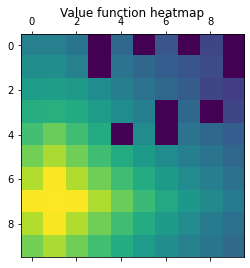

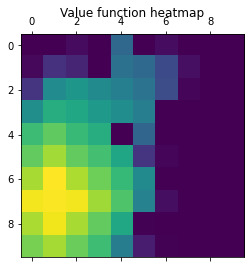

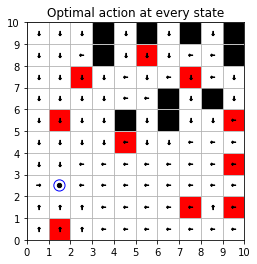

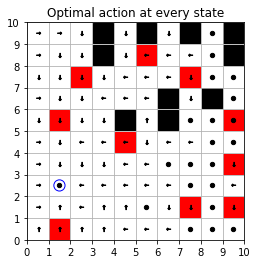

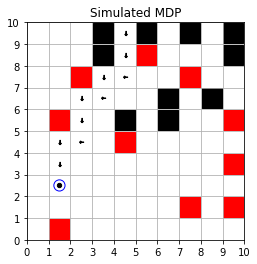

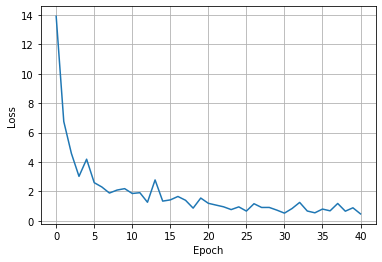

In [ ]:
n = 10 # Dimension of board
N_s = n**2 # Number of states
N_a = 5 # Number of actions
S = np.arange(N_s) # Set of possible states
p1 = 0.9 # Transition probability
p2 = (1-p1)/(N_a-1)
alpha = 0.1 # Learning rate
eps = 0.3 # Epsilon-greedy parameter
gamma = 0.9 # Reward discount rate
N_e = 2500 # Number of episodes
N_t = N_s # Number of actions in trajectory
n_epoch = 50 # Number of episodes in an epoch
tol = 0.5 # Break when loss < tol
s0 = np.random.choice(S) # Starting state

n_o = n # Number of obstacle states
n_r = n # Number of penalty states
n_i = 1 # Number of goal states
n_t = 0 # Number of trap states
o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)

Rd = 2 # Reward for ice cream shop 1
Rs = 5 # Reward for ice cream shop 2
Rw = -1 # Reward for street
Rpts = np.array((Rd,Rs)) # Array of rewards

T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix

# Q-learning:
Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n,N_s,N_a,N_e,N_t,s0,alpha,eps,gamma,S,T,R,n_epoch,tol,rand_start=0)

H = 100 # Horizon in value iteration
A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
s_v = f_Simulate(o_v,t_v,n,H,s0,A_Q,p,rand=0) # Simulate the system using Q-learning

f_Plot_Value(V,n) # Plot heatmap of the value function generated by value iteration
f_Plot_Value(V_Q,n) # Plot heatmap of the value function generated by Q-learning
f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action using value iteration
f_Plot_Actions(A_Q,i_v,o_v,r_v,t_v,n) # Plot the best action using Q-learning
f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states using Q-learning
f_Plot_Loss(dQ_norm_v) # Plot loss function

## Deep Q-learning

In [ ]:
import numpy as np
import math
import torch
import torch.optim as optim
import torch.nn as nn
from matplotlib import pyplot as plt
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Create toy data

# The neural network will take the state as input and output Q_hat[s,a]
# Inputs: (s, a) or (x, y, a)
# Output: Q_hat[s,a]

n = 5 # Board dimension
N_states = n**2
N_actions = 5
train_sz = 10*N_states # Number of samples in training dataset
train_batch_sz = 10 # Size of training batch

# Create sinusoidal training data:
data_range = 15
x1 = (np.random.uniform(0,data_range, size=(data_range*100, 1)))-data_range/2
# x2 = 2*x1 + 3
# x3 = np.log(x1) - x2
# train1 = np.concatenate((x1,x2,x3))
# train2 = np.reshape(train1,(train_sz,3))

# Create training labels:
frq = 2
y = np.sin(frq*x1)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Convert to torch tensors:
train_data= torch.from_numpy(x1).float().to(device)
train_labels = torch.from_numpy(y).float().to(device)
# train_data = torch.Tensor(train2).to(device) # as torch.float32
# labels = np.reshape(labels1,(train_sz,1))
# train_labels = torch.Tensor(labels)

# Create dataset from tensors with matching first dimension
# Samples will be drawn from the first dimension
train_dataset = TensorDataset(train_data, train_labels)

# Create a data loader from the dataset
# Type of sampling and batch size are specified at this step
train_loader = DataLoader(train_dataset, batch_size=train_batch_sz, shuffle=False)

# Create an iterator on the training loader
# (this is just to test the size of x_train and y_train)
cur_x, cur_y = next(iter(train_loader))
print(cur_x.size()) # x_train for current iteration
print(cur_y.size()) # y_train for current iteration

# variables for plotting results
res = 10
x_axis = (np.arange(data_range*res)-data_range/2*res).reshape(data_range*res,1)/res
x_axis_torch = torch.from_numpy(x_axis).float().to(device)

torch.Size([10, 1])
torch.Size([10, 1])


In [ ]:
# Fully-connected network:
class fc_net(torch.nn.Module):
# Network Structure:
# Fully Connected -> ReLu -> Fully Connected -> Linear

  # Initialize the network and specify input/output dimensions:
  def __init__(self, num_in, num_out, w1, w2):
    super(fc_net, self).__init__()
    self.h1 = torch.nn.Linear(in_features=num_in, out_features=w1)  # Fully-connected layer
    self.h2 = torch.nn.Linear(in_features=w2, out_features=1) # Fully-connected layer
  
  # Build the network:
  def forward(self, inputs):
    a1 = F.relu(self.h1(inputs)) # ReLu activation
    a2 = self.h2(a1) # Linear activation
    # a2 = F.sigmoid(self.h2(a1),dim=-1) # Sigmoid activation
    return a2

In [ ]:
# Train the model:
def train(model,loss,train_loader,optimizer,epoch):
  model.train()
  # print('Train Epoch: ', epoch)
  for batch_idx, (cur_x, cur_y) in enumerate(train_loader):

    optimizer.zero_grad() # Zero out gradients
    output = model.forward(cur_x) # Propagate forward through network
    cur_loss = loss(output, cur_y) # Compute loss at current iteration
    cur_loss.backward() # Backprop
    optimizer.step() # Step of optimizer
    losses.append(cur_loss)
    
    # if np.mod(batch_idx+1,it) == 0:
    #   print('Iteration: ', batch_idx+1, ' Loss: ', round(cur_loss.item(),5))

In [ ]:
# Plot the loss:
def f_Plot_loss(losses):
  plt.plot(losses, '-', color = "black")
  plt.title('Training Loss')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.grid()
  plt.show()

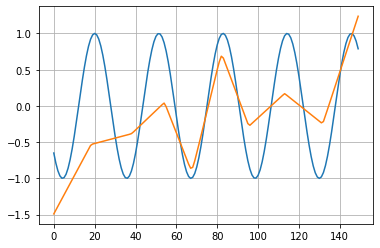

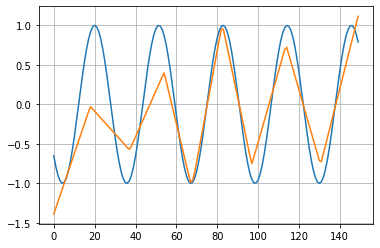

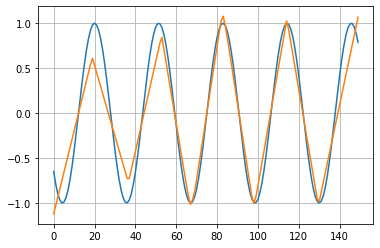

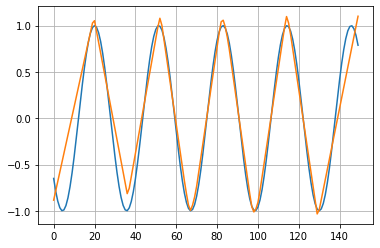

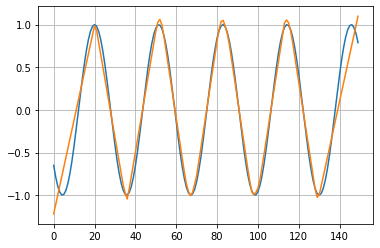

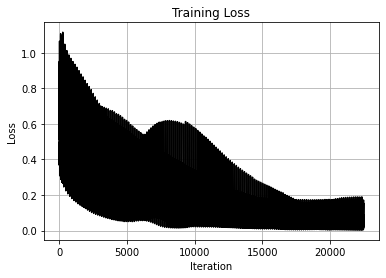

In [ ]:
lr = 2e-3 # Learning rate
n_epochs = 150 # Number of training epochs
plot_every = n_epochs/5 # Plot five times

num_in = 1 # Dimension of input
num_out = 1 # Dimension of output

w1 = 200 # Width of hidden layer 1
w2 = 200 # Width of hidden layer 2

losses = [] # Array of training losses

model = fc_net(num_in, num_out, w1, w2).to(device)
loss = nn.MSELoss(reduction='mean') # Mean squared error loss
# opt = torch.optim.SGD(model.parameters(), lr=lr) # SGD
# opt = torch.optim.SGD(model.parameters(), lr=lr), momentum=0.4) # SGD with momentum
opt = torch.optim.Adam(model.parameters(), lr=lr) # Adam

for epoch in np.arange(n_epochs)+1:
  train(model,loss,train_loader,opt,epoch)

  if (epoch % plot_every) == 0:
    labels = (np.sin(frq*x_axis_torch.cpu())).detach().numpy()
    labels_hat = model(x_axis_torch).cpu().detach().numpy()

    plt.plot(labels)
    plt.plot(labels_hat)
    plt.grid()
    plt.show()

f_Plot_loss(losses)

## Q-learning NUMBA

In [ ]:
# Q-learning NUMBA
import numpy as np
import math
from numba import jit, njit, vectorize, cuda
#make sure to use 32 bit floats when using GPU (either set dtype or ndarray.astype())

# import llvmlite.binding as llvm
# llvm.set_option('', '--debug-only=loop-vectorize')

In [ ]:
#Numba Take Action
@jit(nopython = True)
def f_take_action_NUMBA(s_f, a_f, sVect_f, T_f):
  bagMultiplier = 1000
  T_big = (T[s,a,:]*bagMultiplier).astype(np.int32)
  bag = np.ones(np.sum(T_big), np.int32)

  counter = 0
  for index in range(sVect_f[-1]):
    bag[counter:(counter + T_big[index])] = bag[counter:(counter + T_big[index])]*sVect_f[index]
    counter = counter + T_big[index]

  s_1 = np.random.choice(bag) # new state, chosen with prob from T
  return s_1


In [ ]:
#@jit(nopython = True)
@jit
def f_Q_Learning_s0(n, N_s, N_a,N_e,N_t,s0,alpha,eps,gamma,S,T,R,n_epoch,tol,rand_start=1):

  Q_v = np.zeros((N_s,N_a)) # Initialize Q_v

  num_it = 0 # Number of iterations
  num_ep = 0 # Number of episodes
  dQ_norm = 1
  dQ_norm_v = np.array([])

  # Loop over episodes:
  for i in np.arange(N_e):
  # while dQ_norm > 1e-4:
    num_ep += 1 # Increment the episode counter
    s = int(s0)

    # Loop over steps in trajectory:
    for j in np.arange(N_t):
      num_it += 1 # Increment the iteration counter

      # Epsilon-greedy strategy:
      rand = np.random.rand(1)
      # Explore:
      for cnt in (rand<= eps):
        a = np.random.randint(0,5) # Random action
      # Exploit:
      for cnt in (rand > eps):
        a = np.argmax(Q_v[s,1:]) # Best action using current Q

      # Transition to new state:

      # Value iteration update:
      dQ1 = alpha*(R[s,a,s_1] + gamma*np.max(Q_v[s_1,:]) - Q_v[s,a])
      Q_v[s,a] += dQ1

      s = s_1 # Update state

    # Check for convergence:
    if np.mod(num_ep,n_epoch+1) == 0:
      Q_hat = np.copy(Q_v)
    if num_ep > n_epoch and np.mod(num_ep,n_epoch) == 0:
      dQ = Q_hat - Q_v
      dQ_norm = abs((dQ).max())
      dQ_norm_v = np.append(dQ_norm_v,dQ_norm)
      if dQ_norm < tol:
        break

  Q = Q_v.reshape((n,n,N_a))
  V_Q = np.max(Q,axis=2)
  A_Q = np.argmax(Q_v,axis=1)

  print("Number of episodes: ", num_ep)
  print("Number of iterations: ", num_it)

  return Q, V_Q, A_Q, dQ_norm_v

In [ ]:
#Build up NUMBA GPU CODE
@jit(nopython = True)
# @jit
def f_Q_Learning_GPU(n, N_s, N_a,N_e,N_t,s0,alpha,eps,gamma,S,T,R,n_epoch,tol,rand_start=1):

  Q_v = np.zeros((N_s,N_a)) # Initialize Q_v
  Q = np.zeros((N_s,N_a)) # Initialize Q


  # num_it = 0 # Number of iterations
  # num_ep = 0 # Number of episodes
  # dQ_norm = 1
  # dQ_norm_v = np.array([])

  # # Loop over episodes:
  # for i in np.arange(N_e):
  # # while dQ_norm > 1e-4:
  #   num_ep += 1 # Increment the episode counter
  #   s = int(s0)

  #   # Loop over steps in trajectory:
  #   for j in np.arange(N_t):
  #     num_it += 1 # Increment the iteration counter

  #     # Epsilon-greedy strategy:
  #     rand = np.random.rand(1)
  #     # Explore:
  #     for cnt in (rand<= eps):
  #       a = np.random.randint(0,5) # Random action
  #     # Exploit:
  #     for cnt in (rand > eps):
  #       a = np.argmax(Q_v[s,1:]) # Best action using current Q

  #     # Transition to new state:

  #     # Value iteration update:
  #     dQ1 = alpha*(R[s,a,s_1] + gamma*np.max(Q_v[s_1,:]) - Q_v[s,a])
  #     Q_v[s,a] += dQ1

  #     s = s_1 # Update state

  #   # Check for convergence:
  #   if np.mod(num_ep,n_epoch+1) == 0:
  #     Q_hat = np.copy(Q_v)
  #   if num_ep > n_epoch and np.mod(num_ep,n_epoch) == 0:
  #     dQ = Q_hat - Q_v
  #     dQ_norm = abs((dQ).max())
  #     dQ_norm_v = np.append(dQ_norm_v,dQ_norm)
  #     if dQ_norm < tol:
  #       break

  Q = Q_v.reshape((n,n,N_a))
  print(Q)
  V_Q = np.maximum(Q,[],axis=2)
  # A_Q = Q_v.argmax(axis=1)

  # print("Number of episodes: ", num_ep)
  # print("Number of iterations: ", num_it)

  return Q #, V_Q, A_Q, dQ_norm_v

In [ ]:
# #Test Q-Learning NUMBA
# n = 5 # Dimension of board
# N_s = n**2 # Number of states
# N_a = 5 # Number of actions
# S = np.arange(N_s) # Set of possible states
# S = S.astype(np.int32)
# p1 = 0.9 # Transition probability
# p2 = (1-p1)/(N_a-1)
# alpha = 0.1 # Learning rate
# eps = 0.3 # Epsilon-greedy parameter
# gamma = 0.9 # Reward discount rate
# N_e = 2500 # Number of episodes
# N_t = N_s # Number of actions in trajectory
# n_epoch = 50 # Number of episodes in an epoch
# tol = 0.5 # Break when loss < tol
# # s0 = np.random.choice(S) # Starting state

# n_o = int(n/2) # Number of obstacle states
# n_r = int(n/2) # Number of penalty states
# n_i = 1 # Number of goal states
# n_t = 0 # Number of trap states
# o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t)
# o_v.astype(np.float32)

# Rd = 2 # Reward for ice cream shop 1
# Rs = 5 # Reward for ice cream shop 2
# Rw = -1 # Reward for street
# Rpts = np.array((Rd,Rs),np.float32) # Array of rewards

# T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
# R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix
# T = T.astype(np.float32)
# R = R.astype(np.float32)

# a = 1
# s = 10
# nRun = 1000
# b = np.zeros(nRun, np.int32)
# for i in np.arange(nRun):
#   b[i] = f_take_action_NUMBA(s, a, S, T)
# plt.hist(b)
# # # Q-learning:
# Q = f_Q_Learning_GPU(n,N_s,N_a,N_e,N_t,s0,alpha,eps,gamma,S,T,R,n_epoch,tol,rand_start=0)
# # Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning_GPU(n,N_s,N_a,N_e,N_t,s0,alpha,eps,gamma,S,T,R,n_epoch,tol,rand_start=0)

# # H = 100 # Horizon in value iteration
# # A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
# # s_v = f_Simulate(o_v,t_v,n,H,s0,A_Q,p,rand=0) # Simulate the system using Q-learning

# # f_Plot_Value(V,n) # Plot heatmap of the value function generated by value iteration
# # f_Plot_Value(V_Q,n) # Plot heatmap of the value function generated by Q-learning
# # f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action using value iteration
# # f_Plot_Actions(A_Q,i_v,o_v,r_v,t_v,n) # Plot the best action using Q-learning
# # f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states using Q-learning
# # f_Plot_Loss(dQ_norm_v) # Plot loss function

In [ ]:
@jit(nopython = True)
def f_test_GPU( a ):
  b = a + 1
  return a, b

In [ ]:
def f_test_CPU( a ):
  b = a + 1
  return a, b

In [ ]:
a = np.arange(5)
b = abs(a)
print(type(a))
print(type(b))
q = np.random.rand(6)
Q = q.reshape((3,2))
print(q,'\n',Q)
type(Q)

print(int(100*1.3276))

np.ones(0)

val = 3
# %timeit f_test_GPU( val )
# %timeit f_test_CPU( val)

print(a)
a[2:2] = a[2:2]*1000
print(a)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0.31459343 0.83757667 0.28448626 0.50875179 0.69845689 0.49984036] 
 [[0.31459343 0.83757667]
 [0.28448626 0.50875179]
 [0.69845689 0.49984036]]
132
[0 1 2 3 4]
[0 1 2 3 4]


## RRT & RRT*

RRT

In [ ]:
# This function plots the goal, obstacle, penalty, trap, and start states:
def f_Plot_gopts(i_v,o_v,r_v,t_v,n):
    M, Ms, As = f_Vector_to_Matrix(np.array([s0]),i_v,o_v,r_v,t_v,n) # Convert to matrix form

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Loop through the boxes in the grid and plot the pieces on the board:
    for i in np.arange(n):
      for j in np.arange(n):
        # Plot the ice cream shops as blue circles:
        if M.T[i,n-1-j] == 1:
            plt.scatter(i+0.5,j+0.5,s=500*(5/n)**2,marker="o",facecolors='none', edgecolors='b')
        # Plot the obstacles as black squares:
        elif M.T[i,n-1-j] == -1:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='k', edgecolors='k')
        # Plot the roads as red squares:
        elif M.T[i,n-1-j] == -2:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='r', edgecolors='r')
        # Plot the traps as blue squares:
        elif M.T[i,n-1-j] == -3:
            plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='b', edgecolors='b')
        # Plot the starting state with an x:
        if Ms.T[i,n-1-j] == 1:
            plt.scatter(i+0.5,j+0.5,s=400*(5/n)**2,marker="x",facecolors='k', edgecolors='k')
    
    plt.xlim(0, n)
    plt.ylim(0, n)
    major_ticks = np.arange(0, n+1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')

In [ ]:
# Compute the distance between two states:
def f_Dist(v_new,v,dmode):
  x,y = f_State_to_Matrix(v_new,n)
  xv,yv = f_State_to_Matrix(v,n)
  # x,y = f_State_to_Position(v_new,n)
  # xv,yv = f_State_to_Position(v,n)
  # Euclidean norm
  if dmode == 2:
    d = np.sqrt((x-xv)**2 + (y-yv)**2)
  # Manhattan norm
  elif dmode == 1:
    d = np.abs(x-xv) + np.abs(y-yv)
  return d

In [ ]:
# Find the nearest vertex to v_new in Vertex_list
def f_Nearest(Vertex_list,v_new,dmode):
  d = np.zeros(len(Vertex_list)) # Array of distances
  # For every vertex in Vertex_list
  for i in np.arange(len(Vertex_list)):
    v = Vertex_list[i] # Get a vertex
    d[i] = f_Dist(v_new,v,dmode=dmode) # Compute distance
  idx = np.argmin(d) # Index of smallest distance
  v_nearest = Vertex_list[idx] # Nearest vertex
  return v_nearest, idx, d[idx] # Return nearest vertex, its index, and distance

In [ ]:
# Get a vertex no more than a certain distance away
def f_Get_feasible_vertex(Vertex_list,v_nearest,v_new,n,gr,d):
  x_nearest, y_nearest = f_State_to_Position(v_nearest,n) # Get x-y coords of nearest vertex
  x_new, y_new = f_State_to_Position(v_new,n) # Get x-y coords of proposed new vertex
  dy = y_new - y_nearest # y-displacement
  dx = x_new - x_nearest # x-displacement
  # Compute the coordinates of a point gr units in the direction of the proposed vertex
  xn = x_nearest + (gr/d)*dx
  yn = y_nearest + (gr/d)*dy
  # xn = x_nearest + (gr/np.sqrt(dx**2+dy**2))*dx # x position
  # yn = y_nearest + (gr/np.sqrt(dx**2+dy**2))*dy # y position

  # Round the coords to the nearest integer coordinates in
  # the direction of x_nearest, y_nearest:
  if xn > x_nearest:
    xn = np.floor(xn)
  elif xn < x_nearest:
    xn = np.ceil(xn)
  if yn > y_nearest:
    yn = np.floor(yn)
  elif yn < y_nearest:
    yn = np.ceil(yn)

  v_feasible = f_Pos_to_State(xn,yn,n) # Get nearest state index for xn, yn
  return v_feasible

In [ ]:
# Builds a rapidly-exploring random tree rooted at s0
def f_RRT(s0,o_v,r_v,n,n_it=50,gr=5,dmode=1):
  counter = 0 # Counter
  # Remove start state from list of new possible vertices:
  Sv = np.setdiff1d(np.arange(N_s), s0)
  Vertex_list = np.array([s0]) # List of vertices
  Edge_list = np.array([]) # List of edges

  while counter <= n_it:
    v_new = np.random.choice(Sv) # Propose a new vertex at a random state from S
    v_nearest,_, d = f_Nearest(Vertex_list,v_new,dmode=dmode) # Get nearest vertex
    # If distance greater than growth rate gr:
    if d > gr:
      # Get a feasible vertex at a distance of gr in the direction of v_new
      v_new = f_Get_feasible_vertex(Vertex_list,v_nearest,v_new,n,gr,d)
    # If v_new is not in an obstacle state:
    if v_new not in o_v:
      Sv = np.setdiff1d(Sv, v_new) # Update possible states
      # v_nearest,_,_ = f_Nearest(Vertex_list,v_new,dmode=dmode) # Get nearest vertex
      # Add a new edge to the graph from v_nearest to v_new:
      new_edge = np.array([v_nearest,v_new])
      # Append the new vertex to Vertex_list:
      Vertex_list = np.append(Vertex_list,v_new)
      # Append the new edge to Edge_list:
      Edge_list = np.append(Edge_list,new_edge)
    counter += 1 # Increment the counter

  # Reshape Edge_list to a matrix with 2 columns, for better readability:
  Edge_list = np.reshape(Edge_list,(int(len(Edge_list)/2),2))

  return Vertex_list, Edge_list

Test RRT:

In [ ]:
# Plot RRT
def f_Plot_RRT(Edge_list,n):
  for edge in Edge_list:
    # Get x-y coordinates:
    x0,y0 = f_State_to_Position(edge[0],n)
    x1,y1 = f_State_to_Position(edge[1],n)
    # Plot vertices:
    plt.scatter(x0,y0,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
    plt.scatter(x1,y1,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
    # Plot edge:
    plt.plot(np.array([x0,x1]), np.array([y0,y1]),'k',linestyle='-')

In [ ]:
n = 50 # Dimension of board
N_s = n**2 # Number of states
N_a = 5 # Number of actions
p1 = 0.9 # Transition probability
p2 = (1-p1)/(N_a-1)
alpha = 0.1 # Learning rate
eps = 0.3 # Epsilon-greedy parameter
gamma = 0.9 # Reward discount rate
N_e = 2500 # Number of episodes
N_t = N_s # Number of actions in trajectory
n_epoch = 50 # Number of episodes in an epoch
tol = 0.5 # Break when loss < tol
n_it = 10*n # Number of RRT iterations

n_o = n # Number of obstacle states
n_r = n # Number of penalty states
n_i = 1 # Number of goal states
n_t = 0 # Number of trap states
s0 = n**2 - n # Set start in the bottom left corner
i_v = np.array([n-1]) # Set goal in the top right corner
o_v,_,r_v,t_v = f_Random_Board(n,np.append(i_v,s0),n_i,n_o,n_r,n_t) # Random board

Vertex_list, Edge_list = f_RRT(s0,o_v,r_v,n,n_it=n_it,gr=5) # Run RRT

f_Plot_gopts(i_v,o_v,r_v,t_v,n) # Plot obstacles, etc
f_Plot_RRT(Edge_list,n) # Plot RRT graph
plt.show()

TypeError: ignored

RRT*

In [ ]:
# # Get states that neighbor v_new
# def f_get_neighbors(v_new,Vertex_list,n,radius,dmode):
#   Sn = np.array([],'i') # Array of neighbor states
#   # For every vertex:
#   for i in np.arange(len(Vertex_list)):
#     v = Vertex_list[i] # Get a vertex
#     if v != v_new and f_Dist(v_new,v,dmode=dmode) <= radius: # If distance <= radius
#       Sn = np.append(Sn,i) # Add vertex indices to array of neigbors
#   return Sn

In [ ]:
# # Get minimum-cost neighbor of v_new, and its index
# def f_get_min_cost_neighbor(v_new,Vertex_list,Cost_list,n,radius,dmode):
#   neighbor_idx = f_get_neighbors(v_new,Vertex_list,n,radius,dmode=dmode) # Neighborhood of v_new
#   cost_idx = np.argmin(Cost_list[neighbor_idx]) # Index of minimum-cost neighbor
#   min_neighbor_idx = neighbor_idx[cost_idx] # Minimum-cost neighbor index
#   min_neighbor = Vertex_list[min_neighbor_idx] # Minimum-cost neighbor
#   return min_neighbor, min_neighbor_idx

In [ ]:
# # Get subset of x given by mask (an array of 0s and 1s)
# def f_subset(mask,x):
#   c = mask*x # Multiply by mask
#   return c[c!=0] # Get nonzero entries

In [ ]:
# # Rewire the RRT tree:
# def f_Rewire(v_min,Vertex_list,Edge_list,Cost_list,new_cost,n,radius,dmode=2):
#   neighbor_idx = f_get_neighbors(v_min,Vertex_list,n,radius,dmode=dmode) # Indices of neighbors of v_min
#   neighbors = Vertex_list[neighbor_idx] # Neighbors of v_min
#   costs = Cost_list[neighbor_idx] # Costs of neighbors of v_min
#   potential_costs = np.zeros(len(neighbors)) # Costs of the neighbors if they were routed through v_min
#   # For all neighbors:
#   for i in np.arange(len(neighbors)):
#     v = neighbors[i] # Get a vertex
#     d_p = f_Dist(v_min,v,dmode=dmode) # Distance between v and v_min
#     potential_costs[i] = new_cost + d_p # New cost of v
#   update = potential_costs < costs # Are the new costs less than the old costs?
#   rewire_neighbors = f_subset(update,neighbors) # Vertices to rewire
#   rewire_idx = f_subset(update,neighbor_idx) # Indices of vertices to rewire
#   rewire_costs = f_subset(update,potential_costs) # Costs of vertices to rewire

#   # If rewire_neighbors is not empty:
#   if rewire_neighbors.size > 0:
#     # Remove old edges:
#     for v_rewire in rewire_neighbors:
#       w = np.where(Edge_list==v_rewire)[0] # Get entries of Edge_list that include v_rewire
#       # Since we're dealing with a tree, each vertex has exactly one incoming edge
#       # This means there is exactly one odd-valued index in w.
#       remove_idx = w[np.where(np.mod(w,2)==1)][0] # Save this index to remove_idx
#       Edge_list = np.delete(Edge_list, [remove_idx,remove_idx-1]) # Remove the edge entering v_rewire
#     # Add new edges:
#     for v_rewire in rewire_neighbors:
#       rewire_edge = np.array([v_min,v_rewire]) # New edge between v_min and r_rewire
#       Edge_list = np.append(Edge_list,rewire_edge) # Append to Edge_list
#     # Update costs:
#     for i in np.arange(len(rewire_neighbors)):
#       Cost_list[rewire_idx[i]] = rewire_costs[i] # Update Cost_list with the rewired cost

#   return Edge_list, Cost_list

In [ ]:
# # Builds a rapidly-exploring random tree rooted at s0
# def f_RRT_star(s0,o_v,r_v,n,n_it=50,gr=5,dmode=2):
#   counter = 0 # Counter
#   # Remove start state from list of new possible vertices:
#   Sv = np.setdiff1d(np.arange(N_s), s0)
#   Vertex_list = np.array([s0]) # List of vertices
#   Edge_list = np.array([]) # List of edges
#   Cost_list = np.array([0]) # List of vertex costs

#   while counter <= n_it:
#     v_new = np.random.choice(Sv) # Propose a new vertex at a random state from S
#     v_nearest, idx, d = f_Nearest(Vertex_list,v_new,dmode=dmode) # Get nearest vertex
#     # If distance greater than growth rate gr:
#     if d > gr:
#       # Get a feasible vertex at a distance of gr from v_nearest in the direction of v_proposal
#       v_new = f_Get_feasible_vertex(Vertex_list,v_nearest,v_new,n,gr,d)
#       d = gr
#     # If v_new is not in an obstacle state:
#     if v_new not in o_v:
#       # Get minimum-cost neighbor of v_new:
#       v_min, _ = f_get_min_cost_neighbor(v_new,Vertex_list,Cost_list,n,radius=gr,dmode=dmode)

#       # Update possible states:
#       Sv = np.setdiff1d(Sv, v_new)
#       # Add a new edge to the graph from v_min to v_new:
#       new_edge = np.array([v_min,v_new])
#       # Append the new vertex to Vertex_list:
#       Vertex_list = np.append(Vertex_list,v_new)
#       # Append the new edge to Edge_list:
#       Edge_list = np.append(Edge_list,new_edge)
#       # The cost of a vertex is the cost of its parents
#       # plus the cost of the edge between them:
#       new_cost = Cost_list[idx] + d
#       # Append the new cost to Cost_list:
#       Cost_list = np.append(Cost_list,new_cost)

#       # Edge_list, Cost_list = f_Rewire(v_min,Vertex_list,Edge_list,Cost_list,new_cost,n,radius=gr,dmode=dmode)

#     counter += 1 # Increment the counter

#   # Reshape Edge_list to a matrix with 2 columns, for better readability:
#   Edge_list = np.reshape(Edge_list,(int(len(Edge_list)/2),2))

#   return Vertex_list, Edge_list, Cost_list

Test RRT*:

In [ ]:
# n = 30 # Dimension of board
# N_s = n**2 # Number of states
# N_a = 5 # Number of actions
# p1 = 0.9 # Transition probability
# p2 = (1-p1)/(N_a-1)
# alpha = 0.1 # Learning rate
# eps = 0.3 # Epsilon-greedy parameter
# gamma = 0.9 # Reward discount rate
# N_e = 2500 # Number of episodes
# N_t = N_s # Number of actions in trajectory
# n_epoch = 50 # Number of episodes in an epoch
# tol = 0.5 # Break when loss < tol
# n_it = 10*n # Number of RRT iterations

# n_o = n # Number of obstacle states
# n_r = n # Number of penalty states
# n_i = 1 # Number of goal states
# n_t = 0 # Number of trap states
# s0 = n**2 - n # Set start in the bottom left corner
# i_v = np.array([n-1]) # Set goal in the top right corner
# o_v,_,r_v,t_v = f_Random_Board(n,np.append(i_v,s0),n_i,n_o,n_r,n_t) # Random board

# Vertex_list, Edge_list, Cost_list = f_RRT_star(s0,o_v,r_v,n,n_it=n_it,gr=5) # Run RRT

# # Edge_list_r = np.reshape(Edge_list,(int(len(Edge_list)/2),2))
# f_Plot_gopts(i_v,o_v,r_v,t_v,n) # Plot obstacles, etc
# f_Plot_RRT(Edge_list_r,n) # Plot RRT graph
# plt.show()

Algorithm: \
(1) Grow an RRT tree from your starting state to create new goal states. \
(2) Run RL from your starting state to each of the goal states to get a set of “frontier states.” (the leaves of the tree) \
(3) Run RL from the RRT frontier states to the final goal state. Note: the number of leaf states grows exponentially, so we would want to instead randomly sample from the leaf states. \
(4) If no RRT frontier states can find the final state: \
	Branch again, making new goals and using RL to make new frontier states.
(5) If any RRT frontier states can find the final state, we know we can find a path from the start to the end state.
Break the RRT loop. Suppose we have a collection of frontier states, all of which can reach the goal state. Each frontier state is connected back to the initial state via a single path in the tree. If it takes T1 steps under an intermediate goal and then T2 steps from this state to the final state, this path gets a reward of gamma^(T1+T2) * R, where R is the final reward and gamma is the discount factor. Thus, we can compute the reward for all the paths. \
(6) We want to reduce the number of intermediate goal nodes in the paths. To do this, see if RL can skip any nodes and remove these nodes. Repeat until we have a minimal number of nodes on each path. \
(7) We now select the best path using a genetic algorithm. Each path is a candidate sequence of intermediate goals. Add “mutated” versions of each path in which we perturb (and sometimes remove) the intermediate goal states. Select a subset of the population with the highest rewards and repeat. Break after some number of loops or when the paths converge. Select the best path. We now have a sequence of goals which lead us to the final goal.

# David's RRT

In [ ]:
# Convert the element number of a nxn matrix to the ith and jth value of row and columns respectfully
def f_element_2_Mcoordinate(ele,n):
# Input
# ele: Element number to convert
# n: dimension of the matrix in question with the dimension of nxn
# Ouput
# out(np.atleast_2d(out).T): Numpy column vector of 2 in the for [i j].T for  ith and jth value of row and columns respectfully
  x = (ele)//n
  y = np.mod(ele,n)
  out = [[x],[y]]
  return(np.atleast_2d(out).T)

# Convert the ith and jth value of row and columns respectfully for an nxn matrix to an element number discription
def f_Mcoordinate_2_element(i_mat,j_mat,n):
# Input
# i_mat: ith element or row element of the nxn matrix
# j_mat: ith element or row element of the nxn matrix
  board = np.arange(n**2)
  board = board.reshape((n,n))
  return(board[int(i_mat),int(j_mat)])


In [ ]:
# Given a set of 2D cartisian vectors find the distance and baring for every combination
def f_distance_and_angle(n_vectors):
  # Input
  # n_vectors is a (nxk) grid space node, where each node is a cartisian coordinate
  # k is the number of pair to calculate
  # n is the number of dimensionality
  # Ouput
  # out_dist: From the ith node to the jth node what is the distance (Symmetric)
  # out_baring: From the ith node to the jth node what is the baring in radians (Only available for 2D)

  dx_m=(n_vectors[0]-np.atleast_2d(n_vectors[0]).T)**2 # (kxk) Difference matrix for every combination of x cordinate squared
  dy_m=(n_vectors[1]-np.atleast_2d(n_vectors[1]).T)**2 # (kxk) Difference matrix for every combination of y cordinate squared
  out_dist = np.sqrt(dx_m+dy_m) # Ecledian distance for every node pair

  # v_dot_m = np.dot(np.atleast_2d(n_vectors).T,np.atleast_2d(n_vectors)) # Dot product of every combination
  # v_l2_n = np.sqrt(np.diagonal(v_dot_m)) # L2 norm of every vector
  # v_dot_norm_n = np.dot(np.atleast_2d(v_l2_n).T,np.atleast_2d(v_l2_n)) # Norm combinations 
  # out_baring = np.arccos(np.multiply(v_dot_m,v_dot_norm_n**-1)) ## Baring
  
  node_length = np.shape(n_vectors)[1] # Number of vector sets
  out_baring =np.zeros((node_length,node_length)) # Initilizing output
  for i_bar in np.arange(node_length**2): # Iteration through every element
    i_pair = f_element_2_Mcoordinate(i_bar,node_length)[0] # Convert element to ith,jth pairs
    # print(i_pair)
    x_temp = n_vectors[0, i_pair[1]]-n_vectors[0, i_pair[0]] # Taking difference of x starting point to x destination
    y_temp = n_vectors[1, i_pair[1]]-n_vectors[1, i_pair[0]] # Taking difference of y starting point to y destination
    out_baring[i_pair[0],i_pair[1]] = np.arctan2(x_temp,y_temp) # Finding baring form origin with arctan2
  
  return(out_dist, out_baring)

In [ ]:
# This function proposes is to propose a new node to find a valid trajectory for
# The new proposed node will be appended to the end of the given set of current nodes
def f_n_random(n, Location_Matrix, tol):
  # Input
  # Location_Matrix: List of previous nodes in cartisian form [x y]^T dimensions (2xNoNodes)
  # n: Dimension number of one side of the square gridworld 
  # tol: Maximum distance allowed between new node and the nearest establish nodes
  # Output
  # Location_Matrix_new: An appended version of the input with the new proposed node (2x(NoNodes+1))
  # closest_node: This defines the dimension number of the 2nd axis of L.._M.. of the closest node of the new proposed node
  
  # Initialize a random point in the available state space set
  n_rand = np.zeros((2,1))
  n_rand[0,0] = np.random.choice(np.arange(n))
  n_rand[1,0] = np.random.choice(np.arange(n))

  
  Location_Matrix_new = np.append(Location_Matrix,n_rand,axis=1) # Append it to the pervious node list for output
  # print(Location_Matrix_new)

  new_dist, new_baring = f_distance_and_angle(Location_Matrix_new) # Find all distances and barings of all combinations of node input set including proposed node
  theta = new_dist[:-1,-1] # Isolate distances only related to the proposed node
  closest_node = np.where(theta==np.min(theta))[0][0] # Find the closest node to the proposed node

  # print(new_dist)
  # print(new_baring)
  # if closest_node > 1:
  #   closest_node = closest_node[0]
  
  if new_dist[closest_node,-1]>tol: # Check to see the proposed node is wihtin the distance tolerance
    # Adjust the proposed node to meet the distance tolerance using complext addition
    node_addition = Location_Matrix_new[0,closest_node]+1j*Location_Matrix_new[1,closest_node]+tol*np.exp(1j*new_baring[closest_node,-1])
    # Find cartisan points of new suggest node
    x = np.real(node_addition)
    y = np.imag(node_addition)
    # Round to a valid state element and overwrite for output
    Location_Matrix_new[0,-1] = np.round(x)
    Location_Matrix_new[1,-1] = np.round(y)

    # Check to account for rounding putting node out of enviroment bounds
    Location_Matrix_new = f_checking_bounds(Location_Matrix_new) 

    # Revaluate for repositioned proposed node
    new_dist, new_baring = f_distance_and_angle(Location_Matrix_new) # Find all distances and barings of all combinations of node input set including proposed node
    theta = new_dist[:-1,-1] # Isolate distances only related to the proposed node
    closest_node = np.where(theta==np.min(theta))[0][0] # Find the closest node to the proposed node

  # Check to see if node is already defined by checking distance
  if np.round(new_dist[closest_node,-1],decimals=2) == 0.00:
    print('Same node found, regenerating')
    Location_Matrix_new, closest_node = f_n_random(n, Location_Matrix, tol)

  return(Location_Matrix_new, closest_node)


In [ ]:
def f_checking_bounds(Location_Matrix_new):
  # Check to account for rounding putting node out of enviroment bounds
  if Location_Matrix_new[0,-1]>n-1:
    Location_Matrix_new[0,-1]=n-1
  if Location_Matrix_new[1,-1]>n-1:
    Location_Matrix_new[1,-1]=n-1
  if Location_Matrix_new[0,-1]<0:
    Location_Matrix_new[0,-1]=0
  if Location_Matrix_new[1,-1]<0:
    Location_Matrix_new[1,-1]=0
  return(Location_Matrix_new)

In [ ]:
def f_SimPlot_All_Random_Walk_Q(H, o_v, t_v, r_v, true_goal, n, N_a, p1, Q_Matrix, Connection_M, s0, Location_Matrix, Q_A_Matrix):

  conn_elems = np.arange(np.max(Connection_M))+1
  # print(Connection_M)
  # print(conn_elems)
  # print(conn_elems)
  edge_no = len(conn_elems)
  # print(edge_no)
  S_V_all = np.zeros((edge_no,H))
  # print(np.shape(S_V_all))
  # print(conn_elems)
  # for conn_elem in conn_elems: 
  #   temp = f_element_2_Mcoordinate(conn_elem,node_length)[0]
  #   node_from = temp[0]
  #   node_to = temp[1]
  # print(node_length)
  for conn_elm in np.arange(edge_no):
    edge_curr = conn_elems[conn_elm]
    node_from = np.where(Connection_M==edge_curr)[0]
    node_to = np.where(Connection_M==edge_curr)[1]
    # print('n1 '+str(node_from))
    # print('n2 '+str(node_to))
    starting_element = f_Mcoordinate_2_element(int(Location_Matrix[0,node_from]),int(Location_Matrix[1,node_from]),n)
    # print(temp)
    # print(np.shape(Q_Matrix))
    # Q_v = np.reshape(Q_Matrix[node_from,:,node_to],(n*n,N_a))
    # current_Q = np.reshape(Q_Matrix[node_from,:,node_to],(n,n,N_a))
    # V_Q = np.max(current_Q,axis=2)
    A_Q1 = Q_A_Matrix[node_from,:,node_to].T #np.argmax(Q_v,axis=1)
    s_v = f_Simulate(o_v,t_v,n,H,starting_element,A_Q1,p1,rand=0) # Simulate the system using Q-learning
    # k = np.where((conn_elems-conn_elem)==0)[0]
    S_V_all[conn_elm,:] = s_v.copy().T
    # f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states using Q-learning


  # edge_no = 4
  # starting_node = np.where(Connection_M==edge_no)[0]
  # ending_node = np.where(Connection_M==edge_no)[1]
  # print(starting_node)
  # print(ending_node)
  # starting_element = f_Mcoordinate_2_element(int(Location_Matrix[0,starting_node]),int(Location_Matrix[1,starting_node]),n)
  # print(starting_element)
  # A_Q1 = Q_A_Matrix[starting_node,:,ending_node].T
  # print(np.shape(A_Q1))
  # s_v = f_Simulate(o_v,t_v,n,H,starting_element,A_Q1,p1,rand=0) # Simulate the system using Q-learning
  # f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states using Q-learning



      
  # print(S_V_all)
  f_Plot_Random_Walk_Q (S_V_all, np.atleast_2d(true_goal), o_v, r_v, t_v, n, Location_Matrix, s0, Q_A_Matrix) # Plot the sequence of states using Q-learning


In [ ]:
def f_Plot_Random_Walk_Q (S_V_all2, true_goal, o_v, r_v, t_v, n, Location_Matrix ,s0, Q_A_Matrix):


  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)
  plt.gca().set_aspect('equal', adjustable='box')
  no_edges = np.shape(S_V_all2)[0]

  
  for n_node in np.arange(no_edges):
    # print(n_node)
    # if n_node == 1:
    #   break
    s_v1 = S_V_all2[n_node,:]
    # i_2 = f_Mcoordinate_2_element(Location_Matrix[0,n_node+1],Location_Matrix[1,n_node+1],n)
    # i_v1 = np.array([true_goal[0][0],i_2])
    
    # print(i_v1)
    # M, _, As = f_Vector_to_Matrix(s_v1,i_v1,o_v,r_v,t_v,n) # Convert to matrix form
    M, _, As = f_Vector_to_Matrix(s_v1,true_goal[0],o_v,r_v,t_v,n) # Convert to matrix form
    # Loop through the boxes in the grid and plot the pieces on the board:
    for i in np.arange(n):
      for j in np.arange(n):
        # Plot the ice cream shops as blue circles:
        if M.T[i,n-1-j] == 1 and n_node==0:
          plt.scatter(i+0.5,j+0.5,s=500*(5/n)**2,marker="o",facecolors='none', edgecolors='b')
        # Plot the obstacles as black squares:
        elif M.T[i,n-1-j] == -1 and n_node==0:
          plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='k', edgecolors='k')
        # Plot the roads as red squares:
        elif M.T[i,n-1-j] == -2 and n_node==0:
          plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='r', edgecolors='r')
        # Plot the traps as blue squares:
        elif M.T[i,n-1-j] == -3 and n_node==0:
          plt.scatter(i+0.5,j+0.5,s=1700*(5/n)**2,marker="s",facecolors='b', edgecolors='b')
        # # Plot the states as black dots:
        # if Ms.T[i,n-1-j] == 1:
        #    plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker="o",facecolors='k', edgecolors='k')
        # Plot the states, with arrows pointing in the direction of motion:
        if As.T[i,n-1-j] == 1: # Right
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\rightarrow$',facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == -1: # Left
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\leftarrow$',facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == n: # Down
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\downarrow$',facecolors='k', edgecolors='k')
        elif As.T[i,n-1-j] == -n: # Up
          plt.scatter(i+0.5,j+0.5,s=75*(5/n)**2,marker=r'$\uparrow$',facecolors='k', edgecolors='k')

      if i == n-1:
        for n_node2 in np.arange(np.size(Location_Matrix,1)-1)+1:
          plt.scatter(Location_Matrix[1,n_node2]+0.5,n-1-Location_Matrix[0,n_node2]+0.5,s=1700*(5/n)**2,marker="s", facecolors="c", edgecolors='c')
          # print([Location_Matrix[0,n_node]+0.5,n-1-Location_Matrix[1,n_node]+0.5])
          # print([Location_Matrix[0,n_node],Location_Matrix[1,n_node]])
        plt.scatter(Location_Matrix[1,0]+0.5,n-1-Location_Matrix[0,0]+0.5,s=1700*(5/n)**2,marker="s", facecolors="y", edgecolors='y')
  
        for i_2 in np.arange(n):
            for j_2 in np.arange(n):
              if M.T[i_2,n-1-j_2] == 1:
                plt.scatter(i_2+0.5,j_2+0.5,s=500*(5/n)**2,marker="o",facecolors='none', edgecolors='b')
    
  plt.xlim(0, n)
  plt.ylim(0, n)
  major_ticks = np.arange(0, n+1, 1)
  ax.set_xticks(major_ticks)
  ax.set_yticks(major_ticks)
  ax.grid(which='both')
  plt.title("RRT Q Learning Paths Found")
  plt.show()

In [ ]:
# # Sample Values
# n = 25 # Dimension of board
# N_s = n**2 # Number of states
# N_a = 5 # Number of actions
# p1 = 0.9 # Transition probability
# alpha = 0.1 # Learning rate
# S = np.arange(N_s) # Set of possible states
# eps = 0.3 # Epsilon-greedy parameter
# gamma = 0.9 # Reward discount rate
# N_e = 20000 # Number of episodes
# N_t = N_s # Number of actions in trajectory
# n_epoch = 50 # Number of episodes in an epoch
# tol = 5 # Break when loss < tol
# s0 = np.random.choice(S) # Starting state
# Rw = -1 # Reward for street
# n_o = 10 # Number of obstacle states
# n_r = 0 # Number of penalty states
# n_i = 1 # Number of goal states
# n_t = 0 # Number of trap states
# o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t) # Generate random board with only the "True Goal"
# R_tg = 10
# R_node = 2
# Max_Nodes = 10
# Static_node_dist = 7 # Tolerance or max distance allowed for a proposed node
# H = 200
# Connection_M,Location_Matrix,Q_Matrix,Q_A_Matrix,Goal_node_no = RRT_Q_2_Goal(n,N_a,p1,alpha,eps,gamma,N_e,N_t,n_epoch,tol,s0,o_v,i_v,r_v,t_v,R_tg,R_node,Max_Nodes,Static_node_dist,H,1,1)


def RRT_Q_2_Goal(n,N_a,p1,alpha,eps,gamma,N_e,N_t,n_epoch,tol,s0,o_v,i_v,r_v,t_v,R_tg,R_node,Max_Nodes,Static_node_dist,H,stop_at_goal_vis=0,path_im=0,debugging=0):
  Goal_node_no = None
  N_s = n**2 # Number of states
  S = np.arange(N_s) # Set of possible states
  p2 = (1-p1)/(N_a-1)
  # s0 = np.random.choice(S)
  i_v = np.append(i_v, 0) # Add place holder for the proposed new node reward

  T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
  Rpts = np.array((R_tg,R_node)) # Array of rewards for True Goal and suggest node
  R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix
  Reward_cor = f_element_2_Mcoordinate(i_v[0],n)[0] # Finding goal in pair form
  start_cor = f_element_2_Mcoordinate(s0,n)[0] # Finding goal in pair form
  if debugging==1 or debugging==0:
    print('Starting at state '+str(start_cor)+' or '+str(s0)) # Debugging set to display goal position in ith,jth pair form
    print('True goal is at '+str(Reward_cor)+' or '+str(i_v[0])) # Printing goal pairs
  
  Connection_M = np.zeros((Max_Nodes,Max_Nodes)) # Initialization of binary connection matrix for nodes found
  Q_Matrix = np.zeros((Max_Nodes,N_s*N_a,Max_Nodes)) # 3 dimension matrix to store all Q matrices found 
  Q_A_Matrix = np.zeros((Max_Nodes,N_s,Max_Nodes)) # 3 dimension matrix to store all Q matrices found 
  # ith element is starting node
  # jth element is to access flattened data in row array form
  # kth element is ending node in question

  Location_Matrix = np.zeros((2,1)) # Array of column vectors of every 2D node defined and proposed
  edge_count = 1


  for node in np.arange(Max_Nodes-1)+1: # Iterating accross all nodes not including initial state
    if node == 1:
      Location_Matrix[:,0] = f_element_2_Mcoordinate(s0,n) # Defining initialization state as a node
    Location_Matrix, closest_node = f_n_random(n, Location_Matrix, Static_node_dist) # Generating proposed node to drive_to
    i_v[1] = f_Mcoordinate_2_element(int(Location_Matrix[0,-1]),int(Location_Matrix[1,-1]),n) # Adding location for the porposed node for smaller reward
    
    # Rerun based off new reward
    # T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix is the same every time
    R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix
    
    # Defining starting node state for simulations
    starting_element = f_Mcoordinate_2_element(int(Location_Matrix[0,closest_node]),int(Location_Matrix[1,closest_node]),n)

    Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n,N_s,N_a,N_e,N_t,starting_element,alpha,eps,gamma,S,T,R,n_epoch,tol,0)
    
    # Error Handling
    if np.sum(np.sum(A_Q))==0: # If there is no action taken or suggested
      print('No action found and did not converge')
      Location_Matrix = np.delete(Location_Matrix, -1, 1) # Delete the previous proposed node and rerun
      for fail_node in np.arange(10): # Maximum of 10 failures allowed
        print('fail '+str(fail_node))

        # Rerun algo
        Location_Matrix, closest_node = f_n_random(n, Location_Matrix, Static_node_dist)
        i_v[1] = f_Mcoordinate_2_element(int(Location_Matrix[0,-1]),int(Location_Matrix[1,-1]),n)
        T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
        R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n)
        Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n,N_s,N_a,N_e,N_t,starting_element,alpha,eps,gamma,S,T,R,n_epoch,tol,0)
        
        if np.sum(np.sum(A_Q))!=0: # Checking if new proposed node converges to action
          break
        if fail_node==9: # Stopping script running on 10 failed attempts
          print('Cannot converge stopping...')
          exit()


    Q_Matrix[closest_node,:,node]=Q.copy().flatten().T # Storing Q found for edge
    Q_A_Matrix[closest_node,:,node]=A_Q.copy().flatten().T # Storing Q found for edge
    Connection_M[closest_node,node] = edge_count # Setting connection graph for validate connection found

    s_v = f_Simulate(o_v,t_v,n,H,starting_element,A_Q,p1,rand=0) # Simulate the system using Q-learning
    end_pair = f_Vector_to_Matrix_End_Only(s_v,n)
    if debugging==1:
      # Debugging images, simulations of random walk found
      print(Location_Matrix)
      print('From node '+str(closest_node)+' to node '+ str(node))
      # f_Plot_Loss(dQ_norm_v) # Plot loss function
      print(' ')
      # s_v = f_Simulate(o_v,t_v,n,H,starting_element,A_Q,p1,rand=0) # Simulate the system using Q-learning
      f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states using Q-learning
      print(' ')
      # f_Plot_Value(V_Q,n) # Heat map of value function form Q
      # print()

    if abs(end_pair[0]-Reward_cor.T[0])+abs(end_pair[1]-Reward_cor.T[1])==0:
      Goal_node_no = len(Location_Matrix[0,:])-1
      Location_Matrix[:,-1] = Reward_cor
      break
    elif np.argmax(V_Q)==i_v[0] and stop_at_goal_vis==1:
      Goal_node_no = i_v[0]
      print('True goal visable from last node')
      break

    edge_count = np.max(Connection_M)+1

  if path_im==1:
    f_SimPlot_All_Random_Walk_Q(H, o_v, t_v, r_v, i_v[0], n, N_a, p1, Q_Matrix, Connection_M, s0, Location_Matrix, Q_A_Matrix)
  return(Connection_M,Location_Matrix,Q_Matrix,Q_A_Matrix,Goal_node_no)



In [ ]:
def RRT_Q_Grow(n,N_a,p1,alpha,eps,gamma,N_e,N_t,n_epoch,tol,s0,o_v,i_v,r_v,t_v,R_tg,R_node,Max_Nodes,Static_node_dist,H,Connection_M,Location_Matrix,Q_Matrix,Q_A_Matrix,Goal_node_no,path_im=0,debugging=0):
  N_s = n**2 # Number of states
  S = np.arange(N_s) # Set of possible states
  p2 = (1-p1)/(N_a-1)
  Rpts = np.array(R_node) # Array of rewards for True Goal and suggest node
  edge_count = np.max(Connection_M)+1
  num_n_prev = len(Location_Matrix[0,:])
  fail_node = -1
  i_v = np.append(i_v, 0) # Add place holder for the proposed new node reward
  T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
  Rpts = np.array((0,R_node)) # Array of rewards for True Goal and suggest node
  R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix


  for node in np.arange(Max_Nodes-num_n_prev)+num_n_prev: # Iterating accross all nodes not including initial state

    Location_Matrix, closest_node = f_n_random(n, Location_Matrix, Static_node_dist) # Generating proposed node to drive_to
    i_v[1] = f_Mcoordinate_2_element(int(Location_Matrix[0,-1]),int(Location_Matrix[1,-1]),n) # Adding location for the porposed node for smaller reward
    
    # Rerun based off new reward
    T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
    R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix
    
    # Defining starting node state for simulations
    starting_element = f_Mcoordinate_2_element(int(Location_Matrix[0,closest_node]),int(Location_Matrix[1,closest_node]),n)

    Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n,N_s,N_a,N_e,N_t,starting_element,alpha,eps,gamma,S,T,R,n_epoch,tol,0)
    
    # Error Handling
    if np.sum(np.sum(A_Q))==0: # If there is no action taken or suggested
      print('No action found and did not converge')
      Location_Matrix = np.delete(Location_Matrix, -1, 1) # Delete the previous proposed node and rerun
      for fail_node in np.arange(10): # Maximum of 10 failures allowed
        print('fail '+str(fail_node))

        # Rerun algo
        Location_Matrix, closest_node = f_n_random(n, Location_Matrix, Static_node_dist)
        i_v[1] = f_Mcoordinate_2_element(int(Location_Matrix[0,-1]),int(Location_Matrix[1,-1]),n)
        T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
        R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n)
        Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n,N_s,N_a,N_e,N_t,starting_element,alpha,eps,gamma,S,T,R,n_epoch,tol,0)
        
        if np.sum(np.sum(A_Q))!=0: # Checking if new proposed node converges to action
          break
        if fail_node==9: # Stopping script running on 10 failed attempts
          print('Cannot converge stopping...')
          Location_Matrix = np.delete(Location_Matrix, -1, 1) # Delete the previous proposed node and rerun
          break
          # exit()
    if fail_node==9:
      break

    Q_Matrix[closest_node,:,node]=Q.copy().flatten().T # Storing Q found for edge
    Q_A_Matrix[closest_node,:,node]=A_Q.copy().flatten().T # Storing Q found for edge
    Connection_M[closest_node,node] = edge_count # Setting connection graph for validate connection found

    s_v = f_Simulate(o_v,t_v,n,H,starting_element,A_Q,p1,rand=0) # Simulate the system using Q-learning
    end_pair = f_Vector_to_Matrix_End_Only(s_v,n)
    if debugging==1:
      # Debugging images, simulations of random walk found
      print(Location_Matrix)
      print('From node '+str(closest_node)+' to node '+ str(node))
      f_Plot_Loss(dQ_norm_v) # Plot loss function
      print(' ')
      # s_v = f_Simulate(o_v,t_v,n,H,starting_element,A_Q,p1,rand=0) # Simulate the system using Q-learning
      f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states using Q-learning
      print(' ')
      f_Plot_Value(V_Q,n) # Heat map of value function form Q
      print()

    # if abs(end_pair[0]-Reward_cor.T[0])+abs(end_pair[1]-Reward_cor.T[1])==0:
    #   Goal_node_no = len(Location_Matrix[0,:])
    #   Location_Matrix[:,-1] = Reward_cor
    #   break
    # elif np.argmax(V_Q)==i_v[0] and stop_at_goal_vis==1:
    #   Goal_node_no = Reward_cor
    #   print('True goal visable from last node')
    #   break

    edge_count = np.max(Connection_M)+1
    fail_node = -1

  if path_im==1:
    f_SimPlot_All_Random_Walk_Q(H, o_v, t_v, r_v, i_v[0], n, N_a, p1, Q_Matrix, Connection_M, s0, Location_Matrix, Q_A_Matrix)
  return(Connection_M,Location_Matrix,Q_Matrix,Q_A_Matrix)

In [ ]:
# This function converts the system from
# vector form to matrix form:
def f_Vector_to_Matrix_End_Only(s_v,n):
# Inputs:
# s_v - an array of states
# Ouputs:
# As - a matrix with 1 for right, -1 for left, n for down,
# -n for up, n+1 for final state, and 0 otherwise


  # Compute As (matrix of actions):
  s_v1 = s_v[1:] # States, excluding the first state
  s_v1 = np.append(s_v1,0)
  # a_v is an array of actions, given by the difference between
  # states at time t+1 and at time t
  a_v = s_v1 - s_v
  a_v[np.shape(a_v)[0]-1] = n+1 # Denote last value in a_v as n+1

  As = np.zeros(n**2) # Initialize array of states
  # For each state, record the action taken at this state
  for i in np.arange(np.shape(s_v)[0]):
    As[int(s_v[i])] = a_v[i]
  As = np.reshape(As,(n,n)) # Reshape to nxn matrix

  end_pair = np.where(As==(n+1))
  # print(end_pair)

  return(end_pair)

In [ ]:
def RRT_K_Nearest(k,n,N_a,p1,alpha,eps,gamma,N_e,N_t,n_epoch,tol,s0,o_v,i_v,r_v,t_v,R_tg,R_node,Max_Nodes,Static_node_dist,H,Connection_M,Location_Matrix,Q_Matrix,Q_A_Matrix,Goal_node_no,path_im=0,debugging=0):
  N_s = n**2 # Number of states
  S = np.arange(N_s) # Set of possible states
  p2 = (1-p1)/(N_a-1)
  Rpts = [R_tg] # Array of rewards for True Goal and suggest node
  edge_count = np.max(Connection_M)+1
  num_n_prev = len(Location_Matrix[0,:])
  fail_node = -1
  print('Goal_node_no '+str(Goal_node_no)+' or '+str(i_v))
  print('Connection Matrix')
  print(Connection_M)
  Node_connected_to_goal = np.nonzero(Connection_M[:,Goal_node_no])[0][0]
  print('Connected to goal '+str(Node_connected_to_goal))
  dist_nodes,_ =  f_distance_and_angle(Location_Matrix)
  max_sort_ind = np.argsort(dist_nodes[Goal_node_no,:])
  max_sort_ind_ag = np.delete(max_sort_ind, np.argwhere(((max_sort_ind == Goal_node_no) + (max_sort_ind == Node_connected_to_goal))))
  print('Nodes to connect '+str(max_sort_ind_ag))
  if k>len(max_sort_ind_ag):
    k = len(max_sort_ind_ag)


  for node in np.arange(k): # Iterating accross all nodes not including initial state

    
    # Rerun based off new reward
    T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
    R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix
    
    closest_node = max_sort_ind_ag[node]
    # Defining starting node state for simulations
    starting_element = f_Mcoordinate_2_element(int(Location_Matrix[0,closest_node]),int(Location_Matrix[1,closest_node]),n)

    Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n,N_s,N_a,N_e,N_t,starting_element,alpha,eps,gamma,S,T,R,n_epoch,tol,0)
    
    # Error Handling
    if np.sum(np.sum(A_Q))==0: # If there is no action taken or suggested
      print('No action found and did not converge')
      for fail_node in np.arange(2): # Maximum of 2 failures allowed
        print('fail '+str(fail_node))

        # Rerun algo
        Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n,N_s,N_a,N_e,N_t,starting_element,alpha,eps,gamma,S,T,R,n_epoch,tol,0)
        
        if np.sum(np.sum(A_Q))!=0: # Checking if new proposed node converges to action
          break
        if fail_node==2: # Stopping script running on 10 failed attempts
          print('Cannot converge...')
          fail_node = 5

    if fail_node!=5:
      print('Saving...')

      Q_Matrix[closest_node,:,Goal_node_no]=Q.copy().flatten().T # Storing Q found for edge
      Q_A_Matrix[closest_node,:,Goal_node_no]=A_Q.copy().flatten().T # Storing Q found for edge
      Connection_M[closest_node,Goal_node_no] = edge_count # Setting connection graph for validate connection found

      # s_v = f_Simulate(o_v,t_v,n,H,starting_element,A_Q,p1,rand=0) # Simulate the system using Q-learning
      # end_pair = f_Vector_to_Matrix_End_Only(s_v,n)
      if debugging==1:
        # Debugging images, simulations of random walk found
        print(Location_Matrix)
        print('From node '+str(closest_node)+' to node '+ str(Goal_node_no))
        # f_Plot_Loss(dQ_norm_v) # Plot loss function
        print(' ')
        # s_v = f_Simulate(o_v,t_v,n,H,starting_element,A_Q,p1,rand=0) # Simulate the system using Q-learning
        f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states using Q-learning
        print(' ')
        # f_Plot_Value(V_Q,n) # Heat map of value function form Q
        print()

    # if abs(end_pair[0]-Reward_cor.T[0])+abs(end_pair[1]-Reward_cor.T[1])==0:
    #   Goal_node_no = len(Location_Matrix[0,:])
    #   Location_Matrix[:,-1] = Reward_cor
    #   break
    # elif np.argmax(V_Q)==i_v[0] and stop_at_goal_vis==1:
    #   Goal_node_no = Reward_cor
    #   print('True goal visable from last node')
    #   break

    edge_count = np.max(Connection_M)+1
    fail_node = -1

  if path_im==1:
    # Goal_it = f_Mcoordinate_2_element(int(Location_Matrix[0,Goal_node_no]),int(Location_Matrix[1,Goal_node_no]),n)
    # print(Connection_M)
    f_SimPlot_All_Random_Walk_Q(H, o_v, t_v, r_v, i_v, n, N_a, p1, Q_Matrix, Connection_M, s0, Location_Matrix, Q_A_Matrix)
  return(Connection_M,Location_Matrix,Q_Matrix,Q_A_Matrix)

In [ ]:
import time

# # Sample Values
# tic = time.clock()
# n = 8 # Dimension of board
# N_s = n**2 # Number of states
# N_a = 5 # Number of actions
# p1 = 0.9 # Transition probability
# alpha = 0.1 # Learning rate
# S = np.arange(N_s) # Set of possible states
# eps = 0.3 # Epsilon-greedy parameter
# gamma = 0.9 # Reward discount rate
# N_e = 20000 # Number of episodes
# N_t = N_s # Number of actions in trajectory
# n_epoch = 50 # Number of episodes in an epoch
# tol = 5 # Break when loss < tol
# s0 = np.random.choice(S) # Starting state
# Rw = -1 # Reward for street
# n_o = 0 # Number of obstacle states
# n_r = 0 # Number of penalty states
# n_i = 1 # Number of goal states
# n_t = 0 # Number of trap states
# o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t) # Generate random board with only the "True Goal"
# R_tg = 10
# R_node = 2
# Max_Nodes = int(N_s/5)
# Static_node_dist = 7 # Tolerance or max distance allowed for a proposed node
# H = 200
# k=8

# Connection_M,Location_Matrix,Q_Matrix,Q_A_Matrix,Goal_node_no = RRT_Q_2_Goal(n,N_a,p1,alpha,eps,gamma,N_e,N_t,n_epoch,tol,s0,o_v,i_v,r_v,t_v,R_tg,R_node,Max_Nodes,Static_node_dist,H,0,1,0)
# if len(Location_Matrix[0,:])!=Max_Nodes:
#   print('Number of Nodes '+str(len(Location_Matrix[0,:])))
#   Connection_M2,Location_Matrix2,Q_Matrix2,Q_A_Matrix2 = RRT_Q_Grow(n,N_a,p1,alpha,eps,gamma,N_e,N_t,n_epoch,tol,s0,o_v,i_v,r_v,t_v,R_tg,R_node,Max_Nodes,Static_node_dist,H,Connection_M,Location_Matrix,Q_Matrix,Q_A_Matrix,Goal_node_no,1,0)
#   Connection_M3,Location_Matrix3,Q_Matrix3,Q_A_Matrix3 = RRT_K_Nearest(k,n,N_a,p1,alpha,eps,gamma,N_e,N_t,n_epoch,tol,s0,o_v,i_v,r_v,t_v,R_tg,R_node,Max_Nodes,Static_node_dist,H,Connection_M2,Location_Matrix2,Q_Matrix,Q_A_Matrix2,Goal_node_no,1,0)
# toc = time.clock()
# print(toc-tic)

In [ ]:
# # Sample Values
# n = 25 # Dimension of board
# N_s = n**2 # Number of states
# N_a = 5 # Number of actions
# p1 = 0.9 # Transition probability
# alpha = 0.1 # Learning rate
# S = np.arange(N_s) # Set of possible states
# eps = 0.3 # Epsilon-greedy parameter
# gamma = 0.9 # Reward discount rate
# N_e = 20000 # Number of episodes
# N_t = N_s # Number of actions in trajectory
# n_epoch = 50 # Number of episodes in an epoch
# tol = 5 # Break when loss < tol
# s0 = np.random.choice(S) # Starting state
# Rw = -1 # Reward for street
# n_o = 10 # Number of obstacle states
# n_r = 0 # Number of penalty states
# n_i = 1 # Number of goal states
# n_t = 0 # Number of trap states
# o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t) # Generate random board with only the "True Goal"
# R_tg = 10
# R_node = 2
# Max_Nodes = 50
# Static_node_dist = 7 # Tolerance or max distance allowed for a proposed node
# H = 200
# Connection_M,Location_Matrix,Q_Matrix,Q_A_Matrix,Goal_node_no = RRT_Q_2_Goal(n,N_a,p1,alpha,eps,gamma,N_e,N_t,n_epoch,tol,s0,o_v,i_v,r_v,t_v,R_tg,R_node,Max_Nodes,Static_node_dist,H,1,1)


# Q Recombination

This section focuses on methods to combine Q-tables from the RRT into a global Q-table to solve the sparse Q-learning problem

### Method 1: Path back-up

The RRT algorithm above will return a path $P=\{v_0,\dots,v_n\}$ where $v_0$ is the initial state and $v_n$ is the final reward state. This recombination method computes successive Q-tables starting from the end of the path and working backwards.

\begin{array}{rl}
\text{init:} & Q(s,a)\leftarrow \text{random},\;i=1 \\
\text{loop}: & s_0\leftarrow v_{n-i} \\
& \mathop{\text{loop}}: \text{Q-learning with all trajectories starting from $s_0$} \\
& \text{until: } \text{simulation with } \pi(s)=\mathop{\text{arg}\max}\limits_a Q(s,a) \text{ finds a trajectory } s_0\rightarrow v_n \\
& i\leftarrow i+1 \\
\text{until:} & \text{find a trajectory } v_0\rightarrow v_n
\end{array}

In [ ]:
def f_Build_Path_Matrices(m, s0, sgoal):
  """
  creates path connection matrices for the adjacency matrix m until a path is
  found to exist from s0 to sgoal

  Parameters
  ----------
  m : np.array
    adjacency matrix
    m[i,j] = 1 if node i is adjacent to node j, 0 otherwise
  s0 : int
    index of desired starting node
  sgoal : TYPE
    index of desired stopping node

  Returns
  -------
  m_all : np.array
    path connection matrices
    m_all[i,j,k-1] = 1 if there exists a length k path from node i to node j, 0 otherwise
  """
  
  # initialize with length 1 paths
  path_length = 1
  n_nodes = m.shape[0]
  m_all = np.zeros((n_nodes, n_nodes, n_nodes-1)) # maximum possible path length is n_nodes-1
  m_all[:,:,path_length-1] = m
  
  # extend paths until finding the length of a path from start to goal
  while m_all[s0, sgoal, path_length-1] != 1:
    path_length += 1
    m_all[:,:,path_length-1] = m_all[:,:,path_length-2] @ m
    
  # remove unused indices
  m_all = m_all[:,:,:path_length]

  return m_all

def f_Path_Backup(m, s0, sn, n):
  """
  finds a length n path from s0 to sn

  Parameters
  ----------
  m : np.array
    path connection matrices for the graph
    m[i,j,k-1] = 1 if there exists a length k path from node i to node j, 0 otherwise
  s0 : int
    index of desired starting node
  sn : int
    index of desired stopping node
  n : int
    length of desired path

  Returns
  -------
  np.array of path node indices
  """
  if n == 1:
    return np.r_[s0, sn]
  
  elif n > 1:
    # set of nodes v such that there is a length n-1 path from s0->v
    p1 = np.where(m[s0,:,n-2])
    
    # set of nodes v such that there is a length 1 path from v->sn
    p2 = np.where(m[:,sn,0])
    
    # select a node and backup
    sn1 = np.intersect1d(p1, p2, assume_unique=True)[0]
    return np.r_[f_Path_Backup(m, s0, sn1, n-1), sn]
    
  elif n < 1:
    raise(ValueError("Cannot construct path of length < 1"))

Sequential Q-learning with a hard-coded example world

Number of episodes:  50
Number of iterations:  11250


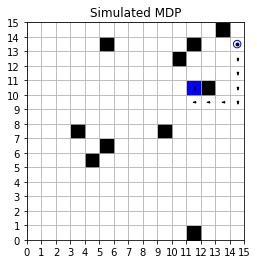

Number of episodes:  50
Number of iterations:  11250


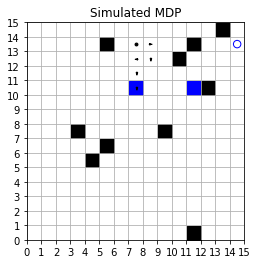

Number of episodes:  50
Number of iterations:  11250


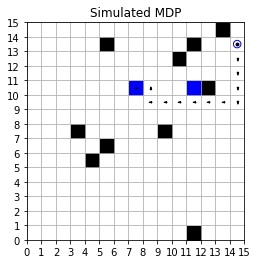

Number of episodes:  50
Number of iterations:  11250


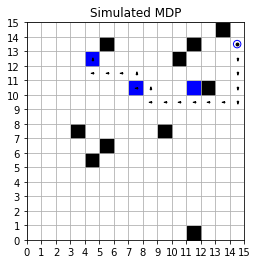

Number of episodes:  50
Number of iterations:  11250


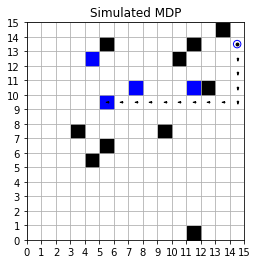

Number of episodes:  50
Number of iterations:  11250


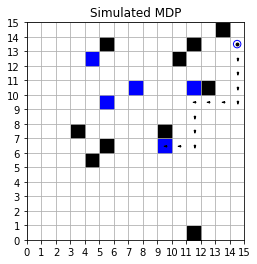

In [ ]:
n = 15 # Dimension of board
N_s = n**2 # Number of states
N_a = 5 # Number of actions
S = np.arange(N_s) # Set of possible states
p1 = 0.9 # Transition probability
p2 = (1-p1)/(N_a-1)
alpha = 0.1 # Learning rate
eps = 0.3 # Epsilon-greedy parameter
gamma = 0.9 # Reward discount rate
N_e = 50 # Number of episodes
N_t = N_s # Number of actions in trajectory
n_epoch = 50 # Number of episodes in an epoch
tol = 0.5 # Break when loss < tol
s0 = np.random.choice(S) # Starting state
H = 200 # time horizon

Rw = -1 # Reward for street

# pick rewards and obstacles manually
i_v = np.r_[29]
o_v = np.r_[20, 40, 108, 114, 13, 221, 125, 72, 139, 26]
t_v = np.array([])
r_v = np.array([])

# build transition and reward functions
T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix

# manually pick a path to back up along
path = np.c_[[4, 11], [4, 7], [2, 4], [5, 5], [8, 9]]

# Q-learning backing up along path
Q_v = np.random.rand(N_s, N_a)
i = 0
path_v = f_Position_to_State(path[:,:i+1], n)
while i < path.shape[1]:
  
  # run Q-learning from path node to final goal, initialized with previously found Q_v
  s0 = f_Position_to_State(path[:,i], n)
  Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n, N_s, N_a, N_e, N_t, s0, alpha, eps, gamma, S, T, R, n_epoch, tol, rand_start=0, Q_v=Q_v)
  
  # update Q_v
  Q_v = Q.reshape(N_s, N_a)
  
  # simulate system and plot results
  s_v = f_Simulate(o_v, t_v, n, H, s0, A_Q, p1, rand=0)
  f_Plot_board(s_v, i_v, o_v, r_v, path_v, n) # there are no trap states, so plot path nodes instead of traps
  
  # if reached goal, back up the chain
  if s_v[-1] == i_v[0]:
    i += 1
    path_v = f_Position_to_State(path[:,:i+1], n)

Q recombination using a path from RRT

In [ ]:

tic = time.clock()

n = 50 # Dimension of board
N_s = n**2 # Number of states
N_a = 5 # Number of actions
p1 = 0.9 # Transition probability
alpha = 0.1 # Learning rate
S = np.arange(N_s) # Set of possible states
eps = 0.5 # Epsilon-greedy parameter
gamma = 0.9 # Reward discount rate
N_e = 20000 # Number of episodes
N_t = N_s # Number of actions in trajectory
n_epoch = 50 # Number of episodes in an epoch
tol = 5 # Break when loss < tol
s0 = N_s-2 #np.random.choice(S) # Starting state
Rw = -1 # Reward for street
n_o = 180 # Number of obstacle states
n_r = 0 # Number of penalty states
n_i = 1 # Number of goal states
n_t = 0 # Number of trap states
o_v,i_v,r_v,t_v = f_Random_Board(n,s0,n_i,n_o,n_r,n_t) # Generate random board with only the "True Goal"
i_v[0] = 0 
R_tg = 10
R_node = 2
Rpts = np.r_[10] # array of rewards for true goal
Max_Nodes = 100
Static_node_dist = 7 # Tolerance or max distance allowed for a proposed node
H = 200

# build transition and reward functions
T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix

# do RRT to build a tree which includes s0 and sgoal
Connection_M,Location_Matrix,Q_Matrix,Q_A_Matrix,sgoal = RRT_Q_2_Goal(n,N_a,p1,alpha,eps,gamma,N_e,N_t,n_epoch,tol,s0,o_v,i_v,r_v,t_v,R_tg,R_node,Max_Nodes,Static_node_dist,H,stop_at_goal_vis=0,path_im=1)

if sgoal is None:
  Exception("RRT did not find goal...")

# fix length 1 path matrix
n_nodes = Location_Matrix.shape[1]
m = Connection_M[:n_nodes,:n_nodes] # take only the nodes we used
m = np.where(m > 0, 1, 0) # convert to binary indexing variable

# generate path matrices to connect first point to sgoal
m_all = f_Build_Path_Matrices(m, 0, sgoal)
path_length = m_all.shape[2]

# find path node indices
p_v_m = f_Path_Backup(m_all, 0, sgoal, path_length)
p_coords = Location_Matrix[:,p_v_m]
p_v = f_Position_to_State(p_coords, n)
print('path node indices (in graph):', p_v_m)
print('path node indices (as states):', p_v)
print('path node coordinates:')
print(p_coords)

# Q-learning backing up along path
Q_v = np.random.rand(N_s, N_a)
i = 1 # start at second to last node, last node is goal
while i < len(p_v):
  
  # run Q-learning from path node to final goal, initialized with previously found Q_v
  s0 = f_Position_to_State(p_coords[:,-(i+1)], n)
  Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n, N_s, N_a, N_e, N_t, s0, alpha, eps, gamma, S, T, R, n_epoch, tol, rand_start=0, Q_v=Q_v)
  
  # update Q_v
  Q_v = Q.reshape(N_s, N_a)
  
  # simulate system and plot results
  s_v = f_Simulate(o_v, t_v, n, H, s0, A_Q, p1, rand=0)
  f_Plot_board(s_v, i_v, o_v, r_v, p_v[-(i+1):], n) # there are no trap states, so plot path nodes instead of traps
  
  # if reached goal, back up the chain
  if s_v[-1] == i_v[0]:
    i += 1

toc = time.clock()
print(toc-tic)

NameError: ignored

In [ ]:
#=== comparison with value iteration ===#

A, V = f_Value_Iteration(n, H, T, R, gamma) # Run value iteration
f_Plot_Value(V, n) # Plot heatmap of the value function generated by value iteration
f_Plot_Actions(A, i_v, o_v, r_v, t_v, n) # Plot the policy using value iteration

f_Plot_Value(V_Q, n) # Plot heatmap of the value function generated by Q learning
f_Plot_Actions(A_Q, i_v, o_v, r_v, t_v, n) # Plot the policy using Q learning

In [ ]:
# Q learning Sample
tic = time.clock()
alpha = 0.1 # Learning rate
eps = 0.3 # Epsilon-greedy parameter
gamma = 0.9 # Reward discount rate
N_e = 5000000 # Number of episodes
N_t = N_s # Number of actions in trajectory
n_epoch = 50 # Number of episodes in an epoch
tol = 5 # Break when loss < tol
Rpts = [R_tg]

T = f_Transition_Probability_Matrix(n,o_v,i_v,r_v,t_v,p=p1) # Transition matrix
R = f_Reward_Matrix(T,Rw,i_v,r_v,Rpts,n) # Reward matrix

Q_v = np.random.rand(N_s, N_a)
Q, V_Q, A_Q, dQ_norm_v = f_Q_Learning(n,N_s,N_a,N_e,N_t,s0,alpha,eps,gamma,S,T,R,n_epoch,tol,rand_start=0,Q_v=Q_v)

H = 100 # Horizon in value iteration
# A, V = f_Value_Iteration(n,H,T,R,gamma) # Run value iteration
s_v = f_Simulate(o_v,t_v,n,H,s0,A_Q,p1,rand=0) # Simulate the system using Q-learning

# f_Plot_Value(V,n) # Plot heatmap of the value function generated by value iteration
f_Plot_Value(V_Q,n) # Plot heatmap of the value function generated by Q-learning
# f_Plot_Actions(A,i_v,o_v,r_v,t_v,n) # Plot the best action using value iteration
# f_Plot_Actions(A_Q,i_v,o_v,r_v,t_v,n) # Plot the best action using Q-learning
f_Plot_board(s_v,i_v,o_v,r_v,t_v,n) # Plot the sequence of states using Q-learning
f_Plot_Loss(dQ_norm_v) # Plot loss function

toc = time.clock()
print(toc-tic)

NameError: ignored

## Maze Code Recursive Room Division

In [ ]:
def f_pick_zones(outerType, innerType, door, s1, s2):
#This code picks the zone furthest from the opening
#Type numbers here represent missing doors in  0-Left, 1Right, 2-Top, 4-Bottom 
#outerType: excluded # for the outer cell no door
#innerType: excluded # for the inner cell no door
#door: index of door
#s1: Starting zone (L-R, T-B)
#s2: ending zone
  horFlags = np.sum(s1,0)
  vertFlags = np.sum(s1,1)
  door = int(door)

  #entering from the Right side 
  if outerType == 0:
    #if Vertical go with the start
    if innerType >= 2:
      return s1
    else:
      if vertFlags[door] == 0:
        return s1
      else:
        return s2
    #entering from the Left side 
  if outerType == 1:
    #if Vertical go with the start
    if innerType >= 2:
      return s2
    else:
      if vertFlags[door] == 0:
        return s1
      else:
        return s2
  #entering from the bottom
  if outerType == 2:
    #Horizontal Divider
    if innerType <= 1:
      return s1
    else:
      #Check if there is a 1 in the vertical door column
      if horFlags[door] == 0:
        return s1
      else:
        return s2
  #Entering from the Top
  if outerType == 3:
    #Horizontal Divider
    if innerType <= 1:
      return s2
    else:
      #Check if there is a 1 in the vertical door column
      if horFlags[door] == 0:
        return s1
      else:
        return s2


In [ ]:

import numpy as np
def f_maze_recursive_division(xDim, yDim, oSize, minSize = 0, rand = True, xBad = np.array([]), yBad = np.array([])):
#xDim: int size in x of maze to be generated
#yDim: (int) size in y
#oSize: (int) how big in states are the doors
#minSize: (int) How much bigger than the min size should the rooms be?
#rand: (bool) Do you want to randomize the room sizes?
#xBad: array states that cannot be chosen for wall placement in X
#yBad: array of states that cannot be chosen for wall placement in Y

  # print('xBad: ', xBad)
  # print('yBad: ', yBad)
#Maze is a 2D matrix 0 = path 1 = wall
  maze = np.zeros((yDim,xDim))

#Validate the opening size
  if oSize < 1:
    oSize = 1
#Change Minimum Required VALID Cells
  if rand == True and minSize > 0:
    minBox = np.random.randint(3,minSize+3)
  else:
    minBox = 3

  
#Sub-divide the Room Horizontally
  #Set up the Vector of wall locations we can have
  xChoose = np.arange(oSize, xDim - (oSize))
  #Reject Bad restriction values
  xBad = xBad[xBad < (xDim - (oSize) -1)] 
  xBad = xBad[xBad >= 0]
  #xBad Holds door locations we can't put walls there
  xChoose = np.setdiff1d(xChoose, xBad)
  #Make sure there are enough cells left to divide the room
  if xChoose.size < minBox:
    return (maze, np.ones((yDim,xDim)), np.ones((yDim,xDim)), 0)
  #Choose 3 pts points with out replacement from the valid locations
  xArray = np.sort(np.random.choice(xChoose, 3, False))

#Sub-divide the Room Vertically
  #Set up the Vector of wall locations we can have
  yChoose = np.arange(oSize, yDim - (oSize))
   #Reject Bad restriction values 
  yBad = yBad[yBad < (yDim - oSize - 1)]
  yBad = yBad[yBad > 0]
  #xBad Holds door locations we can't put walls there
  yChoose = np.setdiff1d( yChoose, yBad)
  #Make sure enough cells remain to pick Top Wall and Bottom
  if yChoose.size < minBox:
    return (maze, np.ones((yDim,xDim)), np.ones((yDim,xDim)), 0)
  #Pick 3 Cells
  yArray = np.sort(np.random.choice(yChoose, 3, False))

#Add the walls to the 2D maze matrix
  maze[:, xArray[1]] = 1 
  maze[yArray[1], :] = 1

#Pick 3 Doors to place (L,R,T,B)
  exclude = np.random.randint(4)
  #Left Horizontal
  if exclude != 0:
    maze[yArray[1], (xArray[0]-(oSize)):(xArray[0])] = 0 #Place Door
    #If you add a hole then add it to the list of places where walls can't go
    fL = np.append(xBad, np.arange((xArray[0]-(oSize)),(xArray[0])) )
  else:
    fL = xBad
  #Right Horixontal
  if exclude != 1:
    maze[yArray[1], (xArray[2]):(xArray[2] + (oSize) )] = 0 #Place Door
    #If you add a hole then add it to the list of places where walls can't go
    fR = np.append(xBad - xArray[1] - 1, np.arange((xArray[2]),(xArray[2] + (oSize))) - (xArray[1]+1))
  else:
    fR = xBad - (xArray[1] + 1) #Allign index for next recusive call
  #Top Vertical
  if exclude != 2:
    maze[(yArray[0] - (oSize)):yArray[0], xArray[1] ] = 0 #Place Door
    #If you add a hole then add it to the list of places where walls can't go
    fT = np.append(yBad, np.arange((yArray[0] - (oSize)),yArray[0]))
  else:
    fT = yBad
  #Bottom Vertical
  if exclude != 3:
    maze[yArray[2]:(yArray[2] + (oSize)), xArray[1] ] = 0 #Place Door
    #If you add a hole then add it to the list of places where walls can't go
    fB = np.append(yBad - yArray[1] - 1, np.arange(yArray[2],(yArray[2] + (oSize))) - yArray[1] -1)
  else:
    fB = yBad - (yArray[1] + 1) #Allign index for next recusive call

#Calcluate Properies for the new subcells
  wL = xArray[1]
  wR = xDim - xArray[1] -1
  wT = yArray[1]
  wB = yDim - yArray[1] -1
  iL = np.arange(xArray[1]-1).astype(int)
  iT = np.arange(yArray[1]-1).astype(int)
  iR = np.arange((xArray[1]), xDim).astype(int)
  iB = np.arange((yArray[1]),yDim).astype(int)
#Run the Maze Program on each new sub cell
  #Top left
  (maze[0:(yArray[1]) , 0:((xArray[1]))],  a,  b, tyTL) = f_maze_recursive_division(wL, wT, oSize, minSize, rand, fL, fT)
  #Top Right
  (maze[0:(yArray[1]) , (xArray[1]+1):xDim], c, d, tyTR) = f_maze_recursive_division(wR, wT, oSize, minSize, rand, fR, fT)
  #Bottom Left
  (maze[(yArray[1]+1):yDim, 0:(xArray[1])], e, f, tyBL) = f_maze_recursive_division(wL, wB, oSize, minSize, rand, fL, fB)
  #Bottom Right
  (maze[(yArray[1]+1):yDim, (xArray[1]+1):xDim], g, h, tyBR) = f_maze_recursive_division(wR, wB, oSize, minSize, rand, fR, fB)
  print((fL>0), (fL < wL - 1), (fL>0) & (fL < wL - 1), sum((fL>0) & (fL < wL - 1)))

#Output the quadrants with the start and ends
  dL = sum((fL>0) & (fL < wL ))
  dR = sum((fR>0) & (fR < wR ))
  dT = sum((fT>0) & (fT < wT)) 
  dB = sum((fB>0) & (fB < wB))
  startS = np.zeros((yDim, xDim))
  endS = np.zeros((yDim, xDim))
  if exclude == 0:
    startS[0:(yArray[1]) , 0:((xArray[1]))] = f_pick_zones(exclude, tyTL, fT[-1], a, b)
    endS[(yArray[1]+1):yDim, 0:(xArray[1])] = f_pick_zones(exclude, tyBL, fB[-1], e, f)
  if exclude == 1:
    startS[0:(yArray[1]) , (xArray[1]+1):xDim] = f_pick_zones(exclude, tyTR, fT[-1], c, d)
    endS[(yArray[1]+1):yDim, (xArray[1]+1):xDim] = f_pick_zones(exclude, tyBR, fB[-1], g, h)
  if exclude == 2:
    startS[0:(yArray[1]) , 0:((xArray[1]))] = f_pick_zones(exclude, tyTL, fL[-1], a, b)
    endS[0:(yArray[1]) , (xArray[1]+1):xDim] = f_pick_zones(exclude, tyTR, fR[-1], c, d) 
  if exclude == 3:
    startS[(yArray[1]+1):yDim, 0:(xArray[1])] = f_pick_zones(exclude, tyBL, fL[-1], e, f)
    endS[(yArray[1]+1):yDim, (xArray[1]+1):xDim] = f_pick_zones(exclude, tyBR, fR[-1], g, h)

  return (maze, startS, endS, exclude)

In [ ]:
def f_maze_recursive_divistion_sv_ov(n, doorSize, extraCells, varryRoom = False, xBad = np.array([]), yBad = np.array([])):
  #The bug is that the opening from the cell 2 many layers out is not tracked
  mazeOut, sStates, eStates, exLast = f_maze_recursive_division(n, n, doorSize, extraCells, varryRoom, xBad, yBad)

  #Reshape the maze into pathlist and obstacle list
  Sarr = np.arange(n*n)
  #get 1D array of states
  walls = np.reshape(mazeOut, mazeOut.size, 'C')
  #Array has 0s in "bad" and states indexed from 1
  paths = (walls*-1 + 1)*(Sarr  + 1)
  walls = walls*(Sarr + 1)
  #State 1D arrays indexed from 0
  wallStates = walls[walls > 0] - 1
  pathStates = paths[paths > 0] - 1

  #Get 1D list of possible starting states
  startS = (np.reshape(sStates, sStates.size, 'C'))*(Sarr  + 1)
  endS = (np.reshape(eStates, eStates.size, 'C'))*(Sarr  + 1)
  validStart = np.setdiff1d(startS[startS > 0] - 1, wallStates)
  validEnd = np.setdiff1d( endS[endS > 0] - 1, wallStates)
  
  # fig, ax = plt.subplots()
  # im = ax.imshow(mazeOut+ sStates*1.5+ eStates*-.5+ np.random.rand(n,n)*.1)
  
  return wallStates, pathStates, validStart, validEnd

In [ ]:
#Generate matrix of obstacles in (y,x) coordinates[]
import numpy as np
import matplotlib.pyplot as plt

wid = 30
len = 30
doorSize = 2
smallestDim = 5 # #of non Door/non wall states in smallest dimension
varryRoom = True # randomizes the size of the rooms between 

#The bug is that the opening from the cell 2 many layers out is not tracked
[mazeOut, startPt, endPt, lastType] = f_maze_recursive_division(wid, len, doorSize, smallestDim, varryRoom)

fig, ax = plt.subplots()
im = ax.imshow(mazeOut+ startPt*1.5+ endPt*-.5+ np.random.rand(wid,len)*.1)
fig.size = [10,10]

In [ ]:
n = 25 # Board size
p = 0.75 # Transition probability
goalValue = 10

N_states = n**2
gamma = 0.95 # Discount factor
H = 80 # Time horizon

Rw = -1 # Reward for street

n_r =  0 # Number of penalty states
n_i = 1 # Number of goal states
n_t = 0 # Number of trap states

#Maze Parameters
doorWidth = 1 #width of Bottlenecks
extraPath = 0 #Number of extra cell width in rooms
randomExtra = False #Randomize room size adds (0-extraPath) cells
restrictedX = np.array([]) #Poke additional Holes in the first division Horizontal
restrictedY = np.array([]) #Poke additional Holes in the first division Horizontal

# Making our maze
o_v, paths, lastroom, firstRoom = f_maze_recursive_divistion_sv_ov(n, doorWidth, extraPath, randomExtra, restrictedX, restrictedY)

print(o_v)
print(paths)


n_r =  n # Number of penalty states
n_i = 1 # Number of goal states
n_t = 0 # Number of trap states

#Ice cream vector
i_v = np.random.choice (lastroom, size = n_i)
#Rpts = reward values for each i_v
Rpts = np.ones(n_i)*goalValue # Reward for goals
#Road vector
r_v = np.random.choice(paths,size=n_r) # Start at random state
#Trap Vector
t_v = np.random.choice(paths, size=n_t) # Start at random state
# Reward for street
Rw = -1
print(n, n*n, i_v.size, Rpts.size)

  #T = Transition Matrix
  #Rw = reward for street r_v 
  #i_v = states where we have rewards (ice cream vector)
  #r_v  = list of street states (road vector)
  #Rpts = reward values for each i_v
  #n = size of square
# f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

s0 = 2 # Start at state 2
gamma = 0.3 # Discount factor
H = 10 # Time horizon

# o_v = np.array([6,7,16,17]) # Array of obstacle states
# i_v = np.array([12,22]) # Array of ice cream shop states
# r_v = n*np.arange(n)+(n-1) # Array of road states
# t_v = np.array([])
# # t_v = r_v

Rd = 2 # Reward for ice cream shop 1
Rs = 5 # Reward for ice cream shop 2
Rw = -1 # Reward for street
Rpts = np.array((Rd,Rs)) # Array of ice cream points

f_Grid_World(n,o_v,i_v,r_v,t_v,p,T,Rw,Rpts,H,gamma,s0,rand=0)

## Multi Path Maze

In [ ]:
def f_pick_zones(outerType, innerType, door, s1, s2):
#This code picks the zone furthest from the opening
#Type numbers here represent missing doors in  0-Left, 1Right, 2-Top, 4-Bottom 
#outerType: excluded # for the outer cell no door
#innerType: excluded # for the inner cell no door
#door: index of door
#s1: Starting zone (L-R, T-B)
#s2: ending zone
  horFlags = np.sum(s1,0)
  vertFlags = np.sum(s1,1)
  door = int(door)

  #entering from the Right side 
  if outerType == 0:
    #if Vertical go with the start
    if innerType >= 2:
      return s1
    else:
      if vertFlags[door] == 0:
        return s1
      else:
        return s2
    #entering from the Left side 
  if outerType == 1:
    #if Vertical go with the start
    if innerType >= 2:
      return s2
    else:
      if vertFlags[door] == 0:
        return s1
      else:
        return s2
  #entering from the bottom
  if outerType == 2:
    #Horizontal Divider
    if innerType <= 1:
      return s1
    else:
      #Check if there is a 1 in the vertical door column
      if horFlags[door] == 0:
        return s1
      else:
        return s2
  #Entering from the Top
  if outerType == 3:
    #Horizontal Divider
    if innerType <= 1:
      return s2
    else:
      #Check if there is a 1 in the vertical door column
      if horFlags[door] == 0:
        return s1
      else:
        return s2

  #If none of these pick randomly
  pick = np.randomchoice(1)
  if pick == 0:
    return s1
  else:
    return s2


In [ ]:

import numpy as np
def f_maze_recursive_division_MULTI(xDim, yDim, count = 0, split = 0, oSize = 1, minSize = 0, rand = True, xBad = np.array([]), yBad = np.array([])):
#xDim: int size in x of maze to be generated
#yDim: (int) size in y
#count: number of recursion layers deep the code is
#split: Control for creating multiple paths: 0=>1path, (-n)random splits, (+n) = period of split
#oSize: (int) how big in states are the doors
#minSize: (int) How much bigger than the min size should the rooms be?
#rand: (bool) Do you want to randomize the room sizes?
#xBad: array states that cannot be chosen for wall placement in X
#yBad: array of states that cannot be chosen for wall placement in Y

  # print('xBad: ', xBad)
  # print('yBad: ', yBad)
#Maze is a 2D matrix 0 = path 1 = wall
  maze = np.zeros((yDim,xDim))
#Validate the opening size
  if oSize < 1:
    oSize = 1

#Change Minimum Required VALID Cells
  if rand == True and minSize > 0:
    minBox = np.random.randint(3,minSize+3)
  else:
    minBox = 3

#Sub-divide the Room Horizontally
  #Set up the Vector of wall locations we can have
  xChoose = np.arange(oSize, xDim - (oSize))
  #Reject Bad restriction values
  xBad = xBad[xBad < (xDim - (oSize) -1)] 
  xBad = xBad[xBad >= 0]
  #xBad Holds door locations we can't put walls there
  xChoose = np.setdiff1d(xChoose, xBad)
  #Make sure there are enough cells left to divide the room
  if xChoose.size < minBox:
    return (maze, np.ones((yDim,xDim)), np.ones((yDim,xDim)), 0)
  #Choose 3 pts points with out replacement from the valid locations
  xArray = np.sort(np.random.choice(xChoose, 3, False))

#Sub-divide the Room Vertically
  #Set up the Vector of wall locations we can have
  yChoose = np.arange(oSize, yDim - (oSize))
   #Reject Bad restriction values 
  yBad = yBad[yBad < (yDim - oSize - 1)]
  yBad = yBad[yBad > 0]
  #xBad Holds door locations we can't put walls there
  yChoose = np.setdiff1d( yChoose, yBad)
  #Make sure enough cells remain to pick Top Wall and Bottom
  if yChoose.size < minBox:
    return (maze, np.ones((yDim,xDim)), np.ones((yDim,xDim)), 0)
  #Pick 3 Cells
  yArray = np.sort(np.random.choice(yChoose, 3, False))

#Add the walls to the 2D maze matrix
  maze[:, xArray[1]] = 1 
  maze[yArray[1], :] = 1

#Pick 3 Doors to place (L,R,T,B)
  exclude = np.random.randint(4)
  #either punch holes randomly or with frequency
  if split != 0:
    count = count + 1
    if np.mod(count, split) == 0:
      exclude = 4
    if split < 0 and count > 1:
      p = np.ones(5)
      p[0:4] = p[0:4]*(1+split)/4
      p[4] = abs(split)
      c = np.arange(5)
      exclude = np.random.choice(c,1,[],p)

  #Left Horizontal
  if exclude != 0:
    maze[yArray[1], (xArray[0]-(oSize)):(xArray[0])] = 0 #Place Door
    #If you add a hole then add it to the list of places where walls can't go
    fL = np.append(xBad, np.arange((xArray[0]-(oSize)),(xArray[0])) )
  else:
    fL = xBad
  #Right Horixontal
  if exclude != 1:
    maze[yArray[1], (xArray[2]):(xArray[2] + (oSize) )] = 0 #Place Door
    #If you add a hole then add it to the list of places where walls can't go
    fR = np.append(xBad - xArray[1] - 1, np.arange((xArray[2]),(xArray[2] + (oSize))) - (xArray[1]+1))
  else:
    fR = xBad - (xArray[1] + 1) #Allign index for next recusive call
  #Top Vertical
  if exclude != 2:
    maze[(yArray[0] - (oSize)):yArray[0], xArray[1] ] = 0 #Place Door
    #If you add a hole then add it to the list of places where walls can't go
    fT = np.append(yBad, np.arange((yArray[0] - (oSize)),yArray[0]))
  else:
    fT = yBad
  #Bottom Vertical
  if exclude != 3:
    maze[yArray[2]:(yArray[2] + (oSize)), xArray[1] ] = 0 #Place Door
    #If you add a hole then add it to the list of places where walls can't go
    fB = np.append(yBad - yArray[1] - 1, np.arange(yArray[2],(yArray[2] + (oSize))) - yArray[1] -1)
  else:
    fB = yBad - (yArray[1] + 1) #Allign index for next recusive call

  wL = xArray[1]
  wR = xDim - xArray[1] -1
  wT = yArray[1]
  wB = yDim - yArray[1] -1
  iL = np.arange(xArray[1]-1).astype(int)
  iT = np.arange(yArray[1]-1).astype(int)
  iR = np.arange((xArray[1]), xDim).astype(int)
  iB = np.arange((yArray[1]),yDim).astype(int)
#Run the Maze Program on each newly created room
  #Top left
  (maze[0:(yArray[1]) , 0:((xArray[1]))],  a,  b, tyTL) = f_maze_recursive_division_MULTI(wL, wT, count, split, oSize, minSize, rand, fL, fT)
  #Top Right
  (maze[0:(yArray[1]) , (xArray[1]+1):xDim], c, d, tyTR) = f_maze_recursive_division_MULTI(wR, wT, count, split, oSize, minSize, rand, fR, fT)
  #Bottom Left
  (maze[(yArray[1]+1):yDim, 0:(xArray[1])], e, f, tyBL) = f_maze_recursive_division_MULTI(wL, wB, count, split, oSize, minSize, rand, fL, fB)
  #Bottom Right
  (maze[(yArray[1]+1):yDim, (xArray[1]+1):xDim], g, h, tyBR) = f_maze_recursive_division_MULTI(wR, wB, count, split, oSize, minSize, rand, fR, fB)
  # print((fL>0), (fL < wL - 1), (fL>0) & (fL < wL - 1), sum((fL>0) & (fL < wL - 1)))
  # print('xDim: ', xDim,' yDim: ', yDim)
  # print('wL: ', wL, ' wR: ', wR, ' wT: ', wT, 'wB:', wB)
  # print('a=', a)
  # print('\nb=', b)
  # print('\nc=', c)
  # print('\nd=', d)
  # print('\ne=', e)
  # print('\nf=', f)
  # print('\ng=', g)
  # print('\nh=', h, '\n\n')
#Output the quadrants with the start and ends
  dL = sum((fL>0) & (fL < wL ))
  dR = sum((fR>0) & (fR < wR ))
  dT = sum((fT>0) & (fT < wT)) 
  dB = sum((fB>0) & (fB < wB))
  startS = np.zeros((yDim, xDim))
  endS = np.zeros((yDim, xDim))    
 
  if exclude == 0:
    startS[0:(yArray[1]) , 0:((xArray[1]))] = f_pick_zones(exclude, tyTL, fT[-1], a, b)
    endS[(yArray[1]+1):yDim, 0:(xArray[1])] = f_pick_zones(exclude, tyBL, fB[-1], e, f)
  if exclude == 1:
    startS[0:(yArray[1]) , (xArray[1]+1):xDim] = f_pick_zones(exclude, tyTR, fT[-1], c, d)
    endS[(yArray[1]+1):yDim, (xArray[1]+1):xDim] = f_pick_zones(exclude, tyBR, fB[-1], g, h)
  if exclude == 2:
    startS[0:(yArray[1]) , 0:((xArray[1]))] = f_pick_zones(exclude, tyTL, fL[-1], a, b)
    endS[0:(yArray[1]) , (xArray[1]+1):xDim] = f_pick_zones(exclude, tyTR, fR[-1], c, d) 
  if exclude == 3:
    startS[(yArray[1]+1):yDim, 0:(xArray[1])] = f_pick_zones(exclude, tyBL, fL[-1], e, f)
    endS[(yArray[1]+1):yDim, (xArray[1]+1):xDim] = f_pick_zones(exclude, tyBR, fR[-1], g, h)
  if exclude == 4: #Pick the one
    startS[0:(yArray[1]) , 0:((xArray[1]))] =  a
    endS[(yArray[1]+1):yDim, (xArray[1]+1):xDim] = h

  return (maze, startS, endS, exclude)

In [ ]:
#Generate matrix of obstacles in (y,x) coordinates[]
import numpy as np
import matplotlib.pyplot as plt

wid = 20
len = 20
doorSize = 0
smallestDim = 0 # #of non Door/non wall states in smallest dimension
varryRoom = False # randomizes the size of the rooms between 
layerR    = -1 #Start at the 0th point in the cycle
splitPeriod = 2 #(-) randomly w/ frequency, (0) never, (+n) with period n

#The bug is that the opening from the cell 2 many layers out is not tracked
[mazeOut, startPt, endPt, lastType] = f_maze_recursive_division_MULTI(wid, len, layerR, splitPeriod, doorSize, smallestDim, varryRoom)

fig, ax = plt.subplots()
im = ax.imshow(mazeOut+ startPt*1.5+ endPt*-.5)

# fig, ax = plt.subplots()
# im = ax.imshow(startPt*1.5)

# fig, ax = plt.subplots()
# im = ax.imshow(endPt*1.5)

In [ ]:
def f_maze_recursive_divistion_sv_MULTI(n, rLayers = 0, splitControl = 0, doorSize = 1, extraCells = 0, varryRoom = False,  xBad = np.array([]), yBad = np.array([])):
#n: int size of suqare maze to be generated
#rLayers: number of recursion layers deep the code is
#splitControl: Control for creating multiple paths: 0=>1path, (-n)random splits, (+n) = period of split
#doorSize: (int) how big in states are the doors
#extraCells: (int) How much bigger than the min size should the rooms be?
#varryRoom: (bool) Do you want to randomize the room sizes?
#xBad: array states that cannot be chosen for wall placement in X
#yBad: array of states that cannot be chosen for wall placement in Y

#Generate the Maze
  mazeOut, sStates, eStates, exLast = f_maze_recursive_division_MULTI(n, n, rLayers, splitControl, doorSize, extraCells, varryRoom, xBad, yBad)

  #Reshape the maze into pathlist and obstacle list
  Sarr = np.arange(n*n)
  #get 1D array of states
  walls = np.reshape(mazeOut, mazeOut.size, 'C')
  #Array has 0s in "bad" and states indexed from 1
  paths = (walls*-1 + 1)*(Sarr  + 1)
  walls = walls*(Sarr + 1)
  #State 1D arrays indexed from 0
  wallStates = walls[walls > 0] - 1
  pathStates = paths[paths > 0] - 1

  #Get 1D list of possible starting states
  startS = (np.reshape(sStates, sStates.size, 'C'))*(Sarr  + 1)
  endS = (np.reshape(eStates, eStates.size, 'C'))*(Sarr  + 1)
  validStart = np.setdiff1d(startS[startS > 0] - 1, wallStates)
  validEnd = np.setdiff1d( endS[endS > 0] - 1, wallStates)
    
  return wallStates, pathStates, validStart, validEnd

In [ ]:
#Create Maze State Vectors
n = 25 # Board size

#Maze Parameters
layerR    = 0 #Start at the 0th point in the cycle
splitPeriod = -.2 #(-) randomly, (0) never, (+n) with period n
doorWidth = 1 #width of Bottlenecks
extraPath = 0 #Number of extra cell width in rooms
randomExtra = False #Randomize room size adds (0-extraPath) cells
restrictedX = np.array([]) #Poke additional Holes in the first division Horizontal
restrictedY = np.array([]) #Poke additional Holes in the first division Horizontal

# Making our maze
o_v, paths, lastroom, firstRoom = f_maze_recursive_divistion_sv_MULTI(n, layerR, splitPeriod, doorWidth, extraPath, randomExtra, restrictedX, restrictedY)


Project Description: 